# **Capstone Project**

## Leading Indicators
| File Name | Type | Use |
|-----------|------|-----|
| `Consumer_Confidence_Index.csv` | Leading | Feature |
| `Business_Confidence_Index.csv` | Leading | Feature |
| `Initial_Claims.csv` | Leading | Feature |
| `Jobs_Added.csv` | Leading | Feature |
| `Housing_Starts.csv` | Leading | Feature |
| `Yield_Curve.csv` | Leading | Feature |
| `Federal_Funds_Rate.csv` | Leading (policy-reactive) | Feature |
| `Supply_Chain_Index.xls` | Leading | Feature |
| `Crude_Oil_Prices.csv` | Contextual | Feature |

In [38]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv', engine='python', on_bad_lines='skip')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Interest_Rates_df = pd.read_csv('Leading/Interest_Rates.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Jobs_Added_df = pd.read_csv('Leading/Jobs_Added.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')
Yield_Curve_df = pd.read_csv('Leading/Yield_Curve.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Jobs_Added_df.to_sql('JobsAdded', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')
Yield_Curve_df.to_sql('YieldCurve', conn, index=False, if_exists='replace')



# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN BusinessConfidence ON InterestRates.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON InterestRates.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON InterestRates.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON InterestRates.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON InterestRates.observation_date = HousingStarts.observation_date
LEFT JOIN JoblessClaims ON InterestRates.observation_date = JoblessClaims.observation_date
LEFT JOIN JobsAdded ON InterestRates.observation_date = JobsAdded.observation_date
LEFT JOIN Volatility ON InterestRates.observation_date = Volatility.observation_date
LEFT JOIN YieldCurve ON InterestRates.observation_date = YieldCurve.observation_date
WHERE InterestRates.observation_date >= '1976-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df


observation_date   DFF observation_date  BSCICP02USM460S observation_date  \
0         1976-01-01  4.83       1976-01-01             17.6       1976-01-01   
1         1976-04-01  5.20       1976-04-01             21.2       1976-04-01   
2         1976-07-01  5.28       1976-07-01             11.8       1976-07-01   
3         1976-10-01  4.87       1976-10-01              7.0       1976-10-01   
4         1977-01-01  4.66       1977-01-01              9.6       1977-01-01   
..               ...   ...              ...              ...              ...   
192       2024-01-01  5.33       2024-01-01             -1.8       2024-01-01   
193       2024-04-01  5.33       2024-04-01             -2.4       2024-04-01   
194       2024-07-01  5.26       2024-07-01             -6.0       2024-07-01   
195       2024-10-01  4.65       2024-10-01             -6.2       2024-10-01   
196       2025-01-01  4.33       2025-01-01              1.8       2025-01-01   

       UMCSENT observation_date  NFCICREDIT observation_date  WTISPLC  \
0    81.567391       1976-01-01    -2.05371       1976-01-01    11.16   
1    83.733333       1976-04-01    -2.21140       1976-04-01    12.17   
2    87.543478       1976-07-01    -1.97208       1976-07-01    12.17   
3    87.909783       1976-10-01    -1.56955       1976-10-01    13.90   
4    87.066304       1977-01-01    -1.73878       1977-01-01    13.90   
..         ...              ...         ...              ...      ...   
192  79.000000       2024-01-01    -0.01606       2024-01-01    74.15   
193  77.200000       2024-04-01    -0.04506       2024-04-01    85.35   
194  66.400000       2024-07-01    -0.03644       2024-07-01    81.80   
195  70.500000       2024-10-01    -0.08510       2024-10-01    71.99   
196  71.700000       2025-01-01    -0.11521       2025-01-01    75.74   

    observation_date  HOUST observation_date    ICSA observation_date  PAYEMS  \
0         1976-01-01   1367       1976-01-01  360846       1976-01-01   78503   
1         1976-04-01   1395       1976-04-01  385692       1976-04-01   79292   
2         1976-07-01   1401       1976-07-01  395231       1976-07-01   79547   
3         1976-10-01   1629       1976-10-01  392154       1976-10-01   79911   
4         1977-01-01   1527       1977-01-01  404077       1977-01-01   80690   
..               ...    ...              ...     ...              ...     ...   
192       2024-01-01   1376       2024-01-01  212154       2024-01-01  157049   
193       2024-04-01   1377       2024-04-01  223615       2024-04-01  157635   
194       2024-07-01   1262       2024-07-01  230769       2024-07-01  158003   
195       2024-10-01   1344       2024-10-01  225462       2024-10-01  158358   
196       2025-01-01   1350       2025-01-01  221167       2025-01-01  159067   

    observation_date  VIXCLS observation_date  Yield_Curve_10Y_2Y_Inversion  
0               None     NaN             None                           NaN  
1               None     NaN             None                           NaN  
2               None     NaN       1976-07-01                          0.98  
3               None     NaN       1976-10-01                          1.43  
4               None     NaN       1977-01-01                          1.31  
..               ...     ...              ...                           ...  
192       2024-01-01   13.71       2024-01-01                         -0.26  
193       2024-04-01   13.98       2024-04-01                         -0.33  
194       2024-07-01   17.07       2024-07-01                         -0.25  
195       2024-10-01   17.36       2024-10-01                          0.12  
196       2025-01-01   18.52       2025-01-01                          0.36  

[197 rows x 20 columns]

## Lagging Indicators
| File Name | Type | Use |
|-----------|------|-----|
| `PPI_Inflation_Rate.csv` | Lagging | Feature |
| `CPI_Inflation_Rate.csv` | Lagging | Feature |
| `Unemployment_Rate.csv` | Lagging | Feature |
| `Labor_Force_Participation.csv` | Lagging | Feature |
| `Real_Gross_Domestic_Product.csv` | Lagging | **Label source** |
| `Deficit_Percent_GDP.csv` | Lagging | Feature (used in derived fiscal stress index) |


In [39]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Labor_Force_df = pd.read_csv('Lagging/Labor_Force_Participation.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Unemployment_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Corporate_Bond_Spreads_df = pd.read_csv('Lagging/Corporate_Bond_Spreads.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Labor_Force_df.to_sql('Labor_Force', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Unemployment_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Real_M2_Stocks_df.to_sql('M2', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Business_Inventories', conn, index=False, if_exists='replace')
Corporate_Bond_Spreads_df.to_sql('Corporate_Bond_Spreads', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM GDP
LEFT JOIN CPI ON GDP.observation_date = CPI.observation_date
LEFT JOIN Labor_Force ON GDP.observation_date = Labor_Force.observation_date
LEFT JOIN PPI ON GDP.observation_date = PPI.observation_date
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN DeficitGDP ON GDP.observation_date = DeficitGDP.observation_date
LEFT JOIN M2 ON GDP.observation_date = M2.observation_date
LEFT JOIN Business_Inventories ON GDP.observation_date = Business_Inventories.observation_date
LEFT JOIN Corporate_Bond_Spreads ON GDP.observation_date = Corporate_Bond_Spreads.observation_date

WHERE GDP.observation_date >= '1976-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df



observation_date      GDPC1 observation_date  CPIAUCSL observation_date  \
0         1976-01-01   6323.649       1976-01-01    55.800       1976-01-01   
1         1976-04-01   6370.025       1976-04-01    56.100       1976-04-01   
2         1976-07-01   6404.895       1976-07-01    57.000       1976-07-01   
3         1976-10-01   6451.177       1976-10-01    57.900       1976-10-01   
4         1977-01-01   6527.703       1977-01-01    58.700       1977-01-01   
..               ...        ...              ...       ...              ...   
191       2023-10-01  22960.600       2023-10-01   307.653       2023-10-01   
192       2024-01-01  23053.545       2024-01-01   309.794       2024-01-01   
193       2024-04-01  23223.906       2024-04-01   313.016       2024-04-01   
194       2024-07-01  23400.294       2024-07-01   313.566       2024-07-01   
195       2024-10-01  23542.349       2024-10-01   315.564       2024-10-01   

     CIVPART observation_date   PPIACO observation_date  UNRATE  \
0       61.3       1976-01-01   59.900       1976-01-01     7.9   
1       61.6       1976-04-01   60.600       1976-04-01     7.7   
2       61.8       1976-07-01   61.600       1976-07-01     7.8   
3       61.6       1976-10-01   61.900       1976-10-01     7.7   
4       61.6       1977-01-01   62.800       1977-01-01     7.5   
..       ...              ...      ...              ...     ...   
191     62.7       2023-10-01  255.192       2023-10-01     3.9   
192     62.5       2024-01-01  251.306       2024-01-01     3.7   
193     62.7       2024-04-01  256.978       2024-04-01     3.9   
194     62.7       2024-07-01  257.321       2024-07-01     4.2   
195     62.5       2024-10-01  253.081       2024-10-01     4.1   

    observation_date  FYFSGDA188S observation_date  M2REAL observation_date  \
0         1976-01-01    -3.935710       1976-01-01  1839.8             None   
1         1976-04-01    -3.596157       1976-04-01  1890.9             None   
2         1976-07-01    -3.256605       1976-07-01  1905.8             None   
3         1976-10-01    -2.917053       1976-10-01  1943.0             None   
4         1977-01-01    -2.577500       1977-01-01  1985.0             None   
..               ...          ...              ...     ...              ...   
191       2023-10-01    -6.238873       2023-10-01  6724.2       2023-10-01   
192       2024-01-01    -6.280020       2024-01-01  6705.5       2024-01-01   
193             None          NaN       2024-04-01  6687.5       2024-04-01   
194             None          NaN       2024-07-01  6728.5       2024-07-01   
195             None          NaN       2024-10-01  6761.1       2024-10-01   

        BUSINV observation_date  BAA10Y  
0          NaN             None     NaN  
1          NaN             None     NaN  
2          NaN             None     NaN  
3          NaN             None     NaN  
4          NaN             None     NaN  
..         ...              ...     ...  
191  2526532.0       2023-10-01    1.83  
192  2533439.0       2024-01-01    1.62  
193  2546223.0       2024-04-01    1.46  
194  2574892.0       2024-07-01    1.59  
195  2585582.0       2024-10-01    1.54  

[196 rows x 18 columns]

## Coincident Indicators

| File Name | Type | Use |
|-----------|------|-----|
| `Capacity_Utilization_Index.csv` | Coincident / Leading | Feature + Label Logic |
| `Industrial_Production_Index.csv` | Coincident | Feature |


In [40]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('Industrial', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Retail', conn, index=False, if_exists='replace')


# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN Industrial ON Capacity.observation_date = Industrial.observation_date
LEFT JOIN Retail ON Capacity.observation_date = Retail.observation_date
WHERE Capacity.observation_date >= '1978-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df


observation_date      TCU observation_date    INDPRO observation_date  \
0         1978-01-01  82.8849       1978-01-01   47.7512             None   
1         1978-04-01  85.5183       1978-04-01   49.9074             None   
2         1978-07-01  85.5628       1978-07-01   50.4371             None   
3         1978-10-01  86.3582       1978-10-01   51.1523             None   
4         1979-01-01  86.0650       1979-01-01   51.5250             None   
..               ...      ...              ...       ...              ...   
183       2023-10-01  78.2766       2023-10-01  102.5781       2023-10-01   
184       2024-01-01  77.7036       2024-01-01  101.4830       2024-01-01   
185       2024-04-01  77.9731       2024-04-01  102.3568       2024-04-01   
186       2024-07-01  77.6310       2024-07-01  102.5192       2024-07-01   
187       2024-10-01  77.1891       2024-10-01  102.2669       2024-10-01   

        value  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
183  227323.0  
184  224062.0  
185  224487.0  
186  226699.0  
187  228287.0  

[188 rows x 6 columns]

## Renaming Columns

In [41]:
# Remove duplicate columns

Final_Lagging_Indicators_df = Lagging_Indicators_df.loc[:, ~Lagging_Indicators_df.columns.duplicated()].copy()

# Rename columns
Final_Lagging_Indicators_df.columns = [
    'Date',
    'GDP_Growth_Rate',
    'Change_in_CPI',
    'Labor_Force_Change',
    'Change_in_PPI',
    'Unemployment_Rate_Change',
    'Deficit_Percent_of_GDP',
    'M2_Stocks_Growth_Rate',
    'Business_Inventories_Growth_Rate',
    'Corporate_Bond_Spreads_Growth_Rate'
]


# Apply transformations
#Final_Lagging_Indicators_df['GDP_Growth_Rate'] = Final_Lagging_Indicators_df['GDP_Growth_Rate'].pct_change().round(2) * 100
#Final_Lagging_Indicators_df['Change_in_CPI'] = Final_Lagging_Indicators_df['Change_in_CPI'].diff().round(2)
#Final_Lagging_Indicators_df['Labor_Force_Change'] = Final_Lagging_Indicators_df['Labor_Force_Change'].diff().round(2)
#Final_Lagging_Indicators_df['Change_in_PPI'] = Final_Lagging_Indicators_df['Change_in_PPI'].diff().round(2)
#Final_Lagging_Indicators_df['Unemployment_Rate_Change'] = Final_Lagging_Indicators_df['Unemployment_Rate_Change'].diff().round(2)
#Final_Lagging_Indicators_df['Deficit_Percent_of_GDP'] = Final_Lagging_Indicators_df['Deficit_Percent_of_GDP']
#Final_Lagging_Indicators_df['M2_Stocks_Growth_Rate'] = Final_Lagging_Indicators_df['M2_Stocks_Growth_Rate'].pct_change().round(2) * 100
#Final_Lagging_Indicators_df['Business_Inventories_Growth_Rate'] = Final_Lagging_Indicators_df['Business_Inventories_Growth_Rate'].pct_change().round(3) * 100
#Final_Lagging_Indicators_df['Corporate_Bond_Spreads_Growth_Rate'] = Final_Lagging_Indicators_df['Corporate_Bond_Spreads_Growth_Rate'].pct_change().round(2) * 100

# Preview
Final_Lagging_Indicators_df


Date  GDP_Growth_Rate  Change_in_CPI  Labor_Force_Change  \
0    1976-01-01         6323.649         55.800                61.3   
1    1976-04-01         6370.025         56.100                61.6   
2    1976-07-01         6404.895         57.000                61.8   
3    1976-10-01         6451.177         57.900                61.6   
4    1977-01-01         6527.703         58.700                61.6   
..          ...              ...            ...                 ...   
191  2023-10-01        22960.600        307.653                62.7   
192  2024-01-01        23053.545        309.794                62.5   
193  2024-04-01        23223.906        313.016                62.7   
194  2024-07-01        23400.294        313.566                62.7   
195  2024-10-01        23542.349        315.564                62.5   

     Change_in_PPI  Unemployment_Rate_Change  Deficit_Percent_of_GDP  \
0           59.900                       7.9               -3.935710   
1           60.600                       7.7               -3.596157   
2           61.600                       7.8               -3.256605   
3           61.900                       7.7               -2.917053   
4           62.800                       7.5               -2.577500   
..             ...                       ...                     ...   
191        255.192                       3.9               -6.238873   
192        251.306                       3.7               -6.280020   
193        256.978                       3.9                     NaN   
194        257.321                       4.2                     NaN   
195        253.081                       4.1                     NaN   

     M2_Stocks_Growth_Rate  Business_Inventories_Growth_Rate  \
0                   1839.8                               NaN   
1                   1890.9                               NaN   
2                   1905.8                               NaN   
3                   1943.0                               NaN   
4                   1985.0                               NaN   
..                     ...                               ...   
191                 6724.2                         2526532.0   
192                 6705.5                         2533439.0   
193                 6687.5                         2546223.0   
194                 6728.5                         2574892.0   
195                 6761.1                         2585582.0   

     Corporate_Bond_Spreads_Growth_Rate  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
..                                  ...  
191                                1.83  
192                                1.62  
193                                1.46  
194                                1.59  
195                                1.54  

[196 rows x 10 columns]

In [42]:

# Remove duplicate columns
Final_Leading_Indicators_df = Leading_Indicators_df.loc[:, ~Leading_Indicators_df.columns.duplicated()].copy()

# Rename columns
Final_Leading_Indicators_df.columns = [
    'Date',
    'Fed_Funds_Rate',
    'Business_Sentiment',
    'Consumer_Sentiment',
    'Credit_Card_Conditons',
    'Oil_Prices',
    'Housing_Starts',
    'Jobless_Claims',
    'Total_Jons',
    'Volatility_Index',
    'Yield_Curve'

]


# Transformations
# Final_Leading_Indicators_df['Fed_Funds_Rate_Change'] = Final_Leading_Indicators_df['Fed_Funds_Rate_Change'].diff().round(2)
# Final_Leading_Indicators_df['Business_Sentiment_Growth_Rate'] = Final_Leading_Indicators_df['Business_Sentiment_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Consumer_Sentiment_Growth_Rate'] = Final_Leading_Indicators_df['Consumer_Sentiment_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Credit_Spread_Growth_Rate'] = Final_Leading_Indicators_df['Credit_Spread_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Oil_Price_Change'] = Final_Leading_Indicators_df['Oil_Price_Change'].pct_change() * 100
# Final_Leading_Indicators_df['Housing_Starts_Change'] = Final_Leading_Indicators_df['Housing_Starts_Change'].pct_change() * 100
# Final_Leading_Indicators_df['Jobless_Claims_Growth_Rate'] = Final_Leading_Indicators_df['Jobless_Claims_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Job_Growth_Rate'] = Final_Leading_Indicators_df['Job_Growth_Rate'].pct_change().round() * 100
# Final_Leading_Indicators_df['Volatility_Growth_Rate'] = Final_Leading_Indicators_df['Volatility_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Yield_Curve_Change'] = Final_Leading_Indicators_df['Yield_Curve_Change'].diff().round(2)


# Preview
Final_Leading_Indicators_df


Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0    1976-01-01            4.83                17.6           81.567391   
1    1976-04-01            5.20                21.2           83.733333   
2    1976-07-01            5.28                11.8           87.543478   
3    1976-10-01            4.87                 7.0           87.909783   
4    1977-01-01            4.66                 9.6           87.066304   
..          ...             ...                 ...                 ...   
192  2024-01-01            5.33                -1.8           79.000000   
193  2024-04-01            5.33                -2.4           77.200000   
194  2024-07-01            5.26                -6.0           66.400000   
195  2024-10-01            4.65                -6.2           70.500000   
196  2025-01-01            4.33                 1.8           71.700000   

     Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0                 -2.05371       11.16            1367          360846   
1                 -2.21140       12.17            1395          385692   
2                 -1.97208       12.17            1401          395231   
3                 -1.56955       13.90            1629          392154   
4                 -1.73878       13.90            1527          404077   
..                     ...         ...             ...             ...   
192               -0.01606       74.15            1376          212154   
193               -0.04506       85.35            1377          223615   
194               -0.03644       81.80            1262          230769   
195               -0.08510       71.99            1344          225462   
196               -0.11521       75.74            1350          221167   

     Total_Jons  Volatility_Index  Yield_Curve  
0         78503               NaN          NaN  
1         79292               NaN          NaN  
2         79547               NaN         0.98  
3         79911               NaN         1.43  
4         80690               NaN         1.31  
..          ...               ...          ...  
192      157049             13.71        -0.26  
193      157635             13.98        -0.33  
194      158003             17.07        -0.25  
195      158358             17.36         0.12  
196      159067             18.52         0.36  

[197 rows x 11 columns]

In [43]:
import pandas as pd

# Remove duplicated columns and make a safe copy
Final_Coincident_Indicators_df = Coincident_Indicators_df.loc[:, ~Coincident_Indicators_df.columns.duplicated()].copy()

# Rename columns to growth rate versions
Final_Coincident_Indicators_df.columns = [
    'Date',
    'Capacity_Utilization_Rate',
    'Industrial_Production_Index',
    'Total_Retail_Sales'
]

# Convert to numeric just in case (optional but safe)
# growth_cols = [
  #  'Capacity_Utilization_Growth_Rate',
   # 'Industrial_Production_Growth_Rate',
    #'Retail_Sales_Growth_Rate'
#]
#Final_Coincident_Indicators_df[growth_cols] = Final_Coincident_Indicators_df[growth_cols].apply(
 #   pd.to_numeric, errors='coerce'
#)

# Calculate percent changes
# Final_Coincident_Indicators_df['Capacity_Utilization_Growth_Rate'] = Final_Coincident_Indicators_df['Capacity_Utilization_Growth_Rate'].pct_change() * 100
# Final_Coincident_Indicators_df['Industrial_Production_Growth_Rate'] = Final_Coincident_Indicators_df['Industrial_Production_Growth_Rate'].pct_change() * 100
# Final_Coincident_Indicators_df['Retail_Sales_Growth_Rate'] = Final_Coincident_Indicators_df['Retail_Sales_Growth_Rate'].pct_change() * 100

# Display the resulting DataFrame
Final_Coincident_Indicators_df.head()



Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  1978-01-01                    82.8849                      47.7512   
1  1978-04-01                    85.5183                      49.9074   
2  1978-07-01                    85.5628                      50.4371   
3  1978-10-01                    86.3582                      51.1523   
4  1979-01-01                    86.0650                      51.5250   

   Total_Retail_Sales  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

### 1980 Recession (Start= January 1980)

In [44]:
# 1980 Recession (January 1980-July 1980)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1979-01-01'
AND LD.date <= '1979-10-01'
"""


# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession


Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0  1979-01-01           10.07                17.0                72.1   
1  1979-04-01           10.18                12.4                66.0   
2  1979-07-01           10.94                 2.6                60.4   
3  1979-10-01           13.58                -2.0                62.1   

   Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0                0.69060       14.85            1630          358000   
1                0.98737       15.85            1748          373385   
2                1.43591       21.75            1760          386231   
3                1.83758       29.00            1681          415615   

   Total_Jons Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0       88808             None  ...           73.8                      5.9   
1       89417             None  ...           76.9                      5.8   
2       90217             None  ...           79.2                      5.7   
3       90481             None  ...           82.1                      6.0   

   Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0               -1.550090                 2002.3   
1               -1.808542                 1986.0   
2               -2.066995                 1965.5   
3               -2.325448                 1942.0   

   Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                              None                                None   
1                              None                                None   
2                              None                                None   
3                              None                                None   

         Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  1979-01-01                    86.0650                      51.5250   
1  1979-04-01                    85.1806                      51.3251   
2  1979-07-01                    84.2881                      51.7029   
3  1979-10-01                    84.0443                      51.7175   

  Total_Retail_Sales  
0               None  
1               None  
2               None  
3               None  

[4 rows x 25 columns]

### 1981 Recession (Start= July 1981)

In [45]:
# 1981-82 Reccesion (July 1981-November 1982)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Fina l_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1980-07-01'
AND LD.date <= '1981-04-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession


Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0  1980-07-01            9.82               -30.0                62.3   
1  1980-10-01           15.85                11.0                75.0   
2  1981-01-01           16.60                -1.6                71.4   
3  1981-04-01           17.79                 3.2                72.4   

   Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0                1.83475        39.5            1269          523769   
1                2.16700        36.0            1523          419615   
2                2.66370        38.0            1547          416154   
3                2.56568        38.0            1360          419615   

   Total_Jons Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0       89840             None  ...           90.3                      7.8   
1       90490             None  ...           92.8                      7.5   
2       91033             None  ...           95.2                      7.5   
3       91283             None  ...           98.0                      7.2   

   Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0               -2.523115                 1871.1   
1               -2.492723                 1871.1   
2               -2.462330                 1842.8   
3               -2.803573                 1862.2   

   Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                              None                                None   
1                              None                                None   
2                              None                                None   
3                              None                                None   

         Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  1980-07-01                    78.1646                      48.4907   
1  1980-10-01                    80.7126                      50.0861   
2  1981-01-01                    80.3913                      50.9328   
3  1981-04-01                    80.0991                      50.7661   

  Total_Retail_Sales  
0               None  
1               None  
2               None  
3               None  

[4 rows x 25 columns]

### 1990 Recession (Start= July 1990)

In [46]:
# Early 1990s Recession (July 1990-March-1991)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1989-07-01'
AND LD.date <= '1990-04-01'
"""


# Run the query
Pre_1990_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1990_Recession.csv"
Pre_1990_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1990_Recession


Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0  1989-07-01            9.08                -8.2                92.0   
1  1989-10-01            8.61                -6.4                93.9   
2  1990-01-01            8.25                -5.6                93.0   
3  1990-04-01            8.24                -0.5                93.9   

   Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0                0.41070      19.644            1427          337571   
1                0.58970      20.091            1410          352000   
2                0.71856      22.641            1551          354077   
3                0.76762      18.582            1248          360000   

   Total_Jons  Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0      108069               NaN  ...          112.8                      5.2   
1      108476               NaN  ...          112.8                      5.3   
2      109196             22.17  ...          114.9                      5.4   
3      109674             18.72  ...          114.1                      5.4   

   Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0               -3.206155                 2451.7   
1               -3.456428                 2483.3   
2               -3.706700                 2483.8   
3               -3.873042                 2483.8   

   Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                              None                                1.86   
1                              None                                1.80   
2                              None                                1.74   
3                              None                                1.52   

         Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  1989-07-01                    83.0423                      61.0896   
1  1989-10-01                    82.7612                      61.4014   
2  1990-01-01                    82.7599                      61.6352   
3  1990-04-01                    82.7825                      62.3511   

  Total_Retail_Sales  
0               None  
1               None  
2               None  
3               None  

[4 rows x 25 columns]

### 2001 Recession (Start= March 2001)

In [47]:
# Early 2000s recession (March 2001-November 2001)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2000-04-01'
AND LD.date <= '2001-01-01'
"""


# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0  2000-04-01            6.27                 9.4               109.2   
1  2000-07-01            6.52                 5.0               108.3   
2  2000-10-01            6.47                -2.6               105.8   
3  2001-01-01            5.60               -17.2                94.7   

   Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0                0.13460       25.74            1626          280846   
1                0.18050       29.77            1463          301929   
2                0.40919       33.08            1549          328538   
3                0.46467       29.58            1600          367769   

   Total_Jons  Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0      131883             24.92  ...          130.7                      3.8   
1      132228             19.17  ...          133.7                      4.0   
2      132352             26.02  ...          135.4                      3.9   
3      132703             25.73  ...          140.0                      4.2   

   Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0                2.031395                 2789.8   
1                1.758210                 2774.3   
2                1.485025                 2801.3   
3                1.211840                 2835.1   

   Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                         1157552.0                                2.41   
1                         1175374.0                                2.29   
2                         1189920.0                                2.60   
3                         1197945.0                                2.77   

         Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  2000-04-01                    82.2761                      92.6659   
1  2000-07-01                    81.4061                      92.8373   
2  2000-10-01                    80.3854                      92.6400   
3  2001-01-01                    78.6272                      91.8908   

   Total_Retail_Sales  
0            158599.0  
1            157863.0  
2            159245.0  
3            158789.0  

[4 rows x 25 columns]

### 2008 Recession (Start= December 2007)

In [48]:
# Great Recession (December 2007-June 2009)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2007-01-01'
AND LD.date <= '2007-10-01'
"""


# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0  2007-01-01            5.25                -1.4                96.9   
1  2007-04-01            5.25                 5.6                87.1   
2  2007-07-01            5.07                 4.6                90.4   
3  2007-10-01            4.50                 0.8                80.9   

   Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0               -0.12796       54.57            1409          315923   
1               -0.14909       63.97            1490          313385   
2                0.22019       74.18            1354          315385   
3                0.44862       86.20            1264          338308   

   Total_Jons  Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0      137472             12.56  ...          164.0                      4.6   
1      137845             13.73  ...          171.4                      4.5   
2      138044             21.59  ...          175.1                      4.7   
3      138177             22.03  ...          174.7                      4.7   

   Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0               -1.110260                 3499.1   
1               -1.608858                 3516.7   
2               -2.107455                 3525.5   
3               -2.606053                 3551.0   

   Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                         1412583.0                                1.58   
1                         1428601.0                                1.70   
2                         1447212.0                                1.65   
3                         1466245.0                                1.95   

         Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  2007-01-01                    80.5114                      99.7546   
1  2007-04-01                    80.9348                     101.5723   
2  2007-07-01                    80.7002                     101.4953   
3  2007-10-01                    80.9210                     101.6446   

   Total_Retail_Sales  
0            178736.0  
1            177844.0  
2            178039.0  
3            179401.0  

[4 rows x 25 columns]

In [49]:
### 2020 COVID-19 Recession (Start= Febuary 2020)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2019-04-01'
AND LD.date <= '2020-04-01'
"""


# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0  2019-04-01            2.40                 5.6                97.2   
1  2019-07-01            2.19                 2.4                98.4   
2  2019-10-01            1.65                -3.4                95.5   
3  2020-01-01            1.25                 1.8                99.8   
4  2020-04-01            0.06               -17.0                71.8   

   Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0               -0.05998       63.86            1272          218385   
1               -0.00717       57.35            1240          209769   
2               -0.03396       53.96            1325          224231   
3                0.12066       57.52            1578          865692   
4                0.48112       16.55             931         2729308   

   Total_Jons  Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0      150593             15.18  ...          202.1                      3.7   
1      150936             15.96  ...          200.7                      3.7   
2      151460             13.99  ...          198.6                      3.6   
3      152031             31.22  ...          199.3                      3.6   
4      130424             34.49  ...          185.5                     14.8   

   Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0               -7.092030                 5702.4   
1               -9.617720                 5806.6   
2              -12.143410                 5898.1   
3              -14.669100                 5949.5   
4              -13.931738                 6642.1   

   Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                         2033324.0                                2.17   
1                         2046137.0                                2.22   
2                         2045691.0                                2.22   
3                         2036248.0                                2.01   
4                         1987957.0                                3.47   

         Date  Capacity_Utilization_Rate  Industrial_Production_Index  \
0  2019-04-01                    78.7309                     102.2748   
1  2019-07-01                    78.5013                     102.0057   
2  2019-10-01                    77.9124                     101.5878   
3  2020-01-01                    76.5390                     101.3372   
4  2020-04-01                    66.8603                      84.6812   

   Total_Retail_Sales  
0            200016.0  
1            202685.0  
2            201908.0  
3            202590.0  
4            158936.0  

[5 rows x 25 columns]

| Economic Indicator                  |    1980 |    1981 |    1990 |    2001 |    2008 |    2020 |
|:------------------------------------|--------:|--------:|--------:|--------:|--------:|--------:|
| Fed Funds Rate                      |   34.86 |   81.16 |   -9.25 |  -10.69 |  -14.29 |  -97.50 |
| Business Sentiment                  | -111.76 | -110.67 | -100.00 | -282.98 | -157.14 | -403.57 |
| Consumer Sentiment                  |  -13.87 |   16.21 |    2.07 |  -13.28 |  -16.51 |  -26.13 |
| Credit Card Conditions              |  166.08 |   39.84 |   86.91 |  245.22 | -450.59 | -902.13 |
| Oil Prices                          |   95.29 |   -3.80 |   -5.41 |   14.92 |   57.96 |  -74.08 |
| Housing Starts                      |    3.13 |    7.17 |  -12.54 |   -1.60 |  -10.29 |  -26.81 |
| Jobless Claims                      |   16.09 |  -19.89 |    6.64 |   30.95 |    7.09 | 1149.77 |
| Total Jobs                          |    1.88 |    1.61 |    1.49 |    0.62 |    0.51 |  -13.39 |
| Volatility Index                    |     NaN |     NaN |     NaN |    3.25 |   75.40 |  127.21 |
| Yield Curve                         |   56.58 | -138.52 |  -70.00 | -197.56 | -566.67 |  126.32 |
| GDP Growth Rate                     |    1.10 |    3.09 |    1.66 |    0.37 |    1.83 |   -7.50 |
| Change in CPI                       |    9.78 |    7.87 |    3.53 |    2.75 |    2.83 |    0.31 |
| Labor Force Change                  |    0.16 |    0.63 |    0.15 |   -0.15 |   -0.90 |   -4.30 |
| Change in PPI                       |   11.25 |    8.53 |    1.15 |    7.12 |    6.52 |   -8.21 |
| Unemployment Rate Change            |    1.69 |   -7.69 |    3.85 |   10.53 |    2.17 |  300.00 |
| Deficit Percent of GDP              |   50.02 |   11.12 |   20.80 |  -40.34 |  134.72 |   96.44 |
| M2 Stocks Growth Rate               |   -3.01 |   -0.48 |    1.31 |    1.62 |    1.48 |   16.48 |
| Business Inventories Growth Rate    |     NaN |     NaN |     NaN |    3.49 |    3.80 |   -2.23 |
| Corporate Bond Spreads Growth Rate  |     NaN |     NaN |  -18.28 |   14.94 |   23.42 |   59.91 |
| Capacity Utilization Rate           |   -2.35 |    2.47 |   -0.31 |   -4.43 |    0.51 |  -15.08 |
| Industrial Production Index         |    0.37 |    4.69 |    2.06 |   -0.84 |    1.89 |  -17.20 |
| Total Retail Sales                  |     NaN |     NaN |     NaN |    0.12 |    0.37 |  -20.54 |

---

### Analysis of Economic Indicators Prior to Recessions:

#### 1. **Federal Funds Rate**:
- **Key Takeaway**: Sharp changes often signal policy shifts aimed at curbing inflation or stimulating economic activity.
- **Importance**: High. Dramatic increases (1981: +81%) and sharp cuts (2020: -97.5%) typically precede recessions. Interest rate policies are crucial recession predictors.

#### 2. **Business Sentiment**:
- **Key Takeaway**: Significantly drops before recessions, indicating declining business confidence.
- **Importance**: High. Consistent sharp declines (-100% to -404%) indicate weakening economic outlook and anticipation of future contraction.

#### 3. **Consumer Sentiment**:
- **Key Takeaway**: Mixed patterns, but a clear negative trend (most cases, sentiment dropped 13-26%).
- **Importance**: Medium-High. Decreasing consumer sentiment often leads to reduced consumer spending, a key driver of economic activity.

#### 4. **Credit Card Conditions**:
- **Key Takeaway**: Extreme volatility (e.g., +245% in 2001, -902% in 2020) indicates changing lending conditions.
- **Importance**: Medium. Sudden tightening of credit conditions often signals upcoming economic stress.

#### 5. **Oil Prices**:
- **Key Takeaway**: Generally increasing sharply pre-recession (e.g., +95% in 1980, +58% in 2008), except for the unique scenario in 2020 (-74%).
- **Importance**: Medium. Sharp oil price increases typically pressure inflation and consumer spending, adding recessionary pressures.

#### 6. **Housing Starts**:
- **Key Takeaway**: Typically decline before recessions (e.g., -12.5% in 1990, -27% in 2020), signaling weakening housing markets.
- **Importance**: High. Housing is a key economic indicator due to its relationship with employment, investment, and credit markets.

#### 7. **Jobless Claims**:
- **Key Takeaway**: Usually increase prior to recessions, dramatically so in extreme cases (e.g., +1150% in 2020).
- **Importance**: High. Rising jobless claims are among the clearest signals of impending economic downturn.

#### 8. **Total Jobs**:
- **Key Takeaway**: Relatively stable, but a sudden drop in 2020 (-13%) signaled major disruptions.
- **Importance**: High. Job growth stagnation or decline strongly correlates with recessionary conditions.

#### 9. **Volatility Index (VIX)**:
- **Key Takeaway**: Major spikes (e.g., +127% in 2020, +75% in 2008) indicate heightened economic uncertainty.
- **Importance**: Medium-High. High volatility often correlates with investor panic and market downturns.

#### 10. **Yield Curve**:
- **Key Takeaway**: Significant flattening or inversion (-566% in 2008, -198% in 2001) consistently precedes recessions.
- **Importance**: Very High. Yield curve inversion is one of the most reliable leading recession indicators historically.

#### 11. **GDP Growth Rate**:
- **Key Takeaway**: Usually slows or declines sharply just before recessions (-7.5% in 2020).
- **Importance**: High. Deteriorating GDP growth often signals economic contraction.

#### 12. **Change in CPI (Inflation)**:
- **Key Takeaway**: Moderate increases typical before recessions, with inflationary pressures evident (e.g., +9.8% in 1980).
- **Importance**: Medium. Elevated inflation can trigger restrictive monetary policies, indirectly predicting recessions.

#### 13. **Labor Force Change**:
- **Key Takeaway**: Slight or negative changes reflect workforce discouragement (e.g., -4.3% in 2020).
- **Importance**: Medium-Low. Less reliable standalone predictor, but important when coupled with other employment indicators.

#### 14. **Change in PPI (Producer Price Index)**:
- **Key Takeaway**: Often rising before recessions, indicating increasing input costs for businesses (e.g., +11% in 1980, +7% in 2008).
- **Importance**: Medium. Reflects inflationary pressures that impact business profitability and investment.

#### 15. **Unemployment Rate Change**:
- **Key Takeaway**: Increases significantly (e.g., +300% in 2020, +11% in 1980), clearly reflecting deteriorating job markets.
- **Importance**: High. Unemployment spikes strongly indicate economic stress and recession onset.

#### 16. **Deficit Percent of GDP**:
- **Key Takeaway**: Typically rises significantly (e.g., +135% in 2008, +96% in 2020), indicating fiscal stress or attempts at fiscal stimulus.
- **Importance**: Medium. Fiscal deficits can indicate economic weakness or stimulus efforts to mitigate recessions.

#### 17. **M2 Stocks Growth Rate** (Money Supply):
- **Key Takeaway**: Generally stable or moderately increasing. Strong growth in 2020 (+16.5%) indicated expansive monetary policy.
- **Importance**: Medium-Low. Useful but less direct as a standalone indicator; more relevant combined with policy context.

#### 18. **Corporate Bond Spreads Growth Rate**:
- **Key Takeaway**: Typically widens (increases) significantly before recessions (+60% in 2020), showing growing financial stress.
- **Importance**: High. Widening spreads reflect risk aversion, liquidity issues, and economic stress in credit markets.

#### 19. **Capacity Utilization Rate**:
- **Key Takeaway**: Usually declines moderately, signaling reduced industrial activity (e.g., -15% in 2020).
- **Importance**: Medium-High. Indicates declining production and economic slowdown clearly.

#### 20. **Industrial Production Index**:
- **Key Takeaway**: Moderate declines (-17% in 2020) reflect reduced manufacturing activity.
- **Importance**: High. Consistently reliable indicator of overall economic health and production capacity.

#### 21. **Total Retail Sales**:
- **Key Takeaway**: Sharp declines (-20.5% in 2020) highlight consumer spending weakness.
- **Importance**: High. A strong indicator of consumer confidence and overall economic momentum.

---

### **Most Important Indicators for Predicting Recessions**:
Based on historical patterns, the following indicators tend to be most predictive and consistently reliable:

- **Yield Curve (inversion or sharp flattening)**
- **Jobless Claims and Unemployment Rate**
- **Business and Consumer Sentiment**
- **Federal Funds Rate (monetary policy)**
- **Housing Starts**
- **Corporate Bond Spreads (credit market stress)**

These indicators reflect critical dimensions of the economy‚Äîemployment, market confidence, monetary policy, housing market health, and financial market stability‚Äîthat directly influence economic cycles and recessions.

--- 

### **Overall Key Takeaway**:
- No single indicator perfectly predicts a recession. However, simultaneous deterioration across several key metrics‚Äîespecially employment, consumer/business confidence, yield curve inversion, and credit conditions‚Äîis the most reliable warning sign of an impending recession.

### Z-Score

In [50]:
# Great Recession (December 2007-June 2009)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1999-01-01'
AND LD.date <= '2020-07-01'
"""


# Run the query
Z_Score = pd.read_sql_query(sql_query, conn)

# Save to CSV

# Close DB connection
conn.close()

# Show final DataFrame
Z_Score

Date  Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
0   1999-01-01            4.73                 1.2               103.9   
1   1999-04-01            4.75                 4.6               104.6   
2   1999-07-01            5.10                 7.2               106.0   
3   1999-10-01            5.30                14.4               103.2   
4   2000-01-01            5.68                13.4               112.0   
..         ...             ...                 ...                 ...   
82  2019-07-01            2.19                 2.4                98.4   
83  2019-10-01            1.65                -3.4                95.5   
84  2020-01-01            1.25                 1.8                99.8   
85  2020-04-01            0.06               -17.0                71.8   
86  2020-07-01            0.09                 7.6                72.5   

    Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
0                -0.03160       12.47            1748          311385   
1                -0.08848       17.34            1553          301385   
2                -0.03849       20.07            1669          293154   
3                 0.03367       22.64            1608          284077   
4                 0.03005       27.18            1636          285846   
..                    ...         ...             ...             ...   
82               -0.00717       57.35            1240          209769   
83               -0.03396       53.96            1325          224231   
84                0.12066       57.52            1578          865692   
85                0.48112       16.55             931         2729308   
86                0.01999       40.71            1523         1042538   

    Total_Jons  Volatility_Index  ...  Change_in_PPI Unemployment_Rate_Change  \
0       127699             27.25  ...          122.9                      4.3   
1       128596             24.40  ...          123.6                      4.3   
2       129421             23.32  ...          125.7                      4.3   
3       130178             22.66  ...          127.7                      4.1   
4       131011             23.15  ...          128.3                      4.0   
..         ...               ...  ...            ...                      ...   
82      150936             15.96  ...          200.7                      3.7   
83      151460             13.99  ...          198.6                      3.6   
84      152031             31.22  ...          199.3                      3.6   
85      130424             34.49  ...          185.5                     14.8   
86      139255             25.81  ...          193.0                     10.2   

    Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
0                 1.304200                 2673.3   
1                 1.554295                 2689.2   
2                 1.804390                 2720.7   
3                 2.054485                 2732.1   
4                 2.304580                 2757.0   
..                     ...                    ...   
82               -9.617720                 5806.6   
83              -12.143410                 5898.1   
84              -14.669100                 5949.5   
85              -13.931738                 6642.1   
86              -13.194375                 7082.6   

    Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
0                          1077080.0                                2.57   
1                          1092918.0                                2.29   
2                          1104062.0                                2.16   
3                          1115766.0                                2.27   
4                          1140023.0                                1.67   
..                               ...                                 ...   
82                         2046137.0                                2.22   
83                        

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Z_Score_numeric = Z_Score.select_dtypes(include=['number'])


# Drop non-numeric columns and redundant date columns
economic_data = Z_Score_numeric.select_dtypes(include=['number'])

# Handle potential missing values by imputing with mean
economic_data.fillna(economic_data.mean(), inplace=True)

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(economic_data)

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
Z_Score_numeric['Cluster'] = cluster_labels

# Summarize cluster characteristics by their mean values
cluster_summary = Z_Score_numeric.groupby('Cluster').mean()

cluster_summary


Fed_Funds_Rate  Business_Sentiment  Consumer_Sentiment  \
Cluster                                                           
0              3.603333            5.461111           93.536111   
1              0.462727            2.163636           69.327273   
2              0.830000            7.717241           91.006897   

         Credit_Card_Conditons  Oil_Prices  Housing_Starts  Jobless_Claims  \
Cluster                                                                      
0                     0.004330   40.308056     1733.750000   346040.972222   
1                     0.363756   83.790455      711.363636   546312.636364   
2                    -0.082904   63.647586     1171.827586   311890.517241   

            Total_Jons  Volatility_Index  Yield_Curve  ...  \
Cluster                                                ...   
0        132623.222222         20.145556     0.917778  ...   
1        133016.227273         25.590455     1.984091  ...   
2        144196.689655         15.855172     1.090000  ...   

         Labor_Force_Change  Change_in_PPI  Unemployment_Rate_Change  \
Cluster                                                                
0                 66.452778     144.325000                  4.947222   
1                 64.559091     190.286364                  8.563636   
2                 62.862069     196.910345                  5.162069   

         Deficit_Percent_of_GDP  M2_Stocks_Growth_Rate  \
Cluster                                                  
0                     -1.144260            3149.252778   
1                     -7.500554            4132.609091   
2                     -4.687704            5359.982759   

         Business_Inventories_Growth_Rate  Corporate_Bond_Spreads_Growth_Rate  \
Cluster                                                                         
0                            1.217793e+06                            2.319167   
1                            1.509420e+06                            3.320000   
2                            1.866012e+06                            2.407586   

         Capacity_Utilization_Rate  Industrial_Production_Index  \
Cluster                                                           
0                        78.959350                    93.504394   
1                        74.333986                    93.548073   
2                        77.593397                   100.817166   

         Total_Retail_Sales  
Cluster                      
0             166027.527778  
1             167398.181818  
2             191923.931034  

[3 rows x 22 columns]

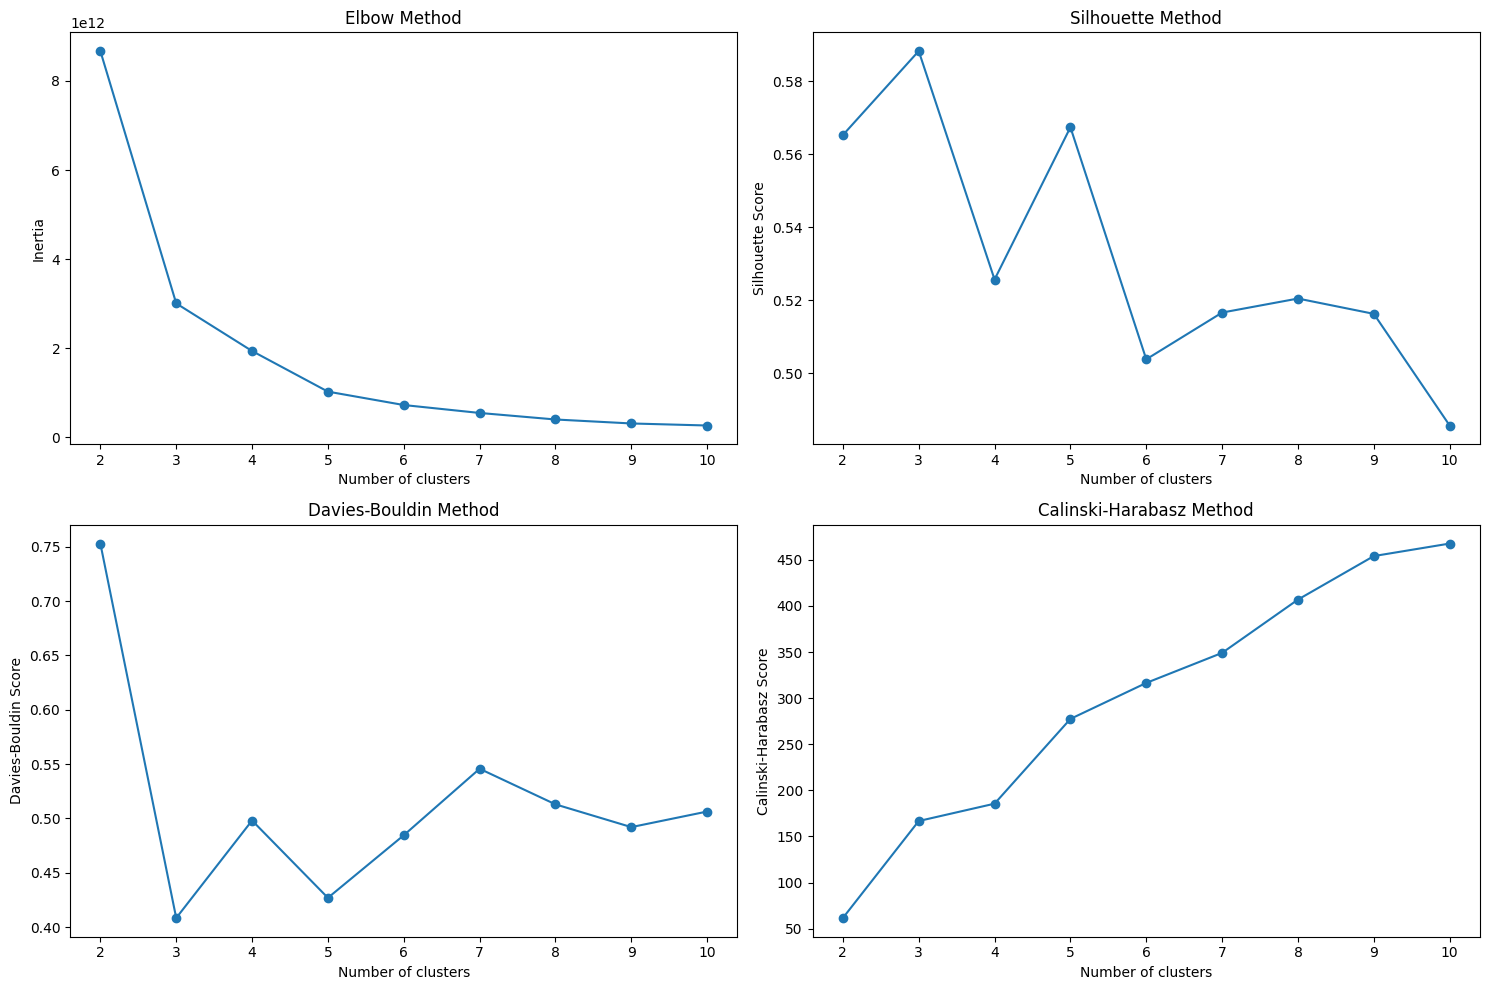

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

Z_Score_numeric = Z_Score.select_dtypes(include=['number'])


# Elbow, Silhouette, Davies-Bouldin, Calinski-Harabasz methods to determine optimal clusters
inertia = []
silhouette = []
davies_bouldin = []
calinski_harabasz = []

# Range of clusters to test
cluster_range = range(2, 11)

# Loop through cluster range to calculate metrics
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Z_Score_numeric)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(Z_Score_numeric, labels))
    davies_bouldin.append(davies_bouldin_score(Z_Score_numeric, labels))
    calinski_harabasz.append(calinski_harabasz_score(Z_Score_numeric, labels))

# Plot Elbow method
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

# Plot Davies-Bouldin score (lower is better)
plt.subplot(2, 2, 3)
plt.plot(cluster_range, davies_bouldin, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Method')

# Plot Calinski-Harabasz score (higher is better)
plt.subplot(2, 2, 4)
plt.plot(cluster_range, calinski_harabasz, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Method')

plt.tight_layout()
plt.show()


Explained variance by PC1 and PC2: [0.55396362 0.44579683]


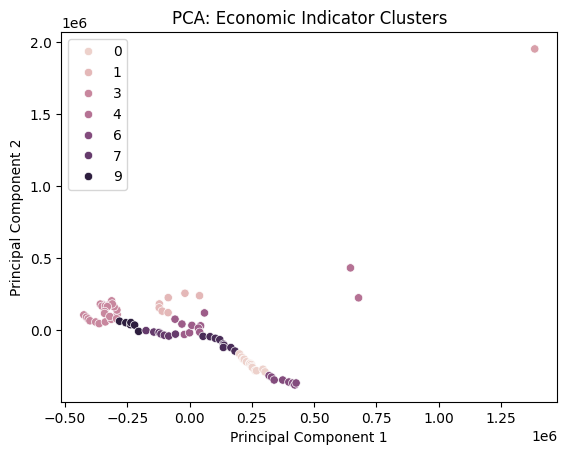

In [53]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run PCA
pca = PCA(n_components=2)
components = pca.fit_transform(Z_Score_numeric)

# PCA components DataFrame
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1 and PC2: {explained_variance}')

sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=labels)
plt.title('PCA: Economic Indicator Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Certainly! Here's the interpretation neatly formatted into a markdown table:

| Cluster | Economic State          | Key Indicators                                                    | Description                                                                 |
|---------|-------------------------|-------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **0**   | Moderate Economic Stability | - Moderate Fed Funds rate (~3.6%)<br>- Moderate consumer sentiment (~93.5)<br>- Moderate housing starts<br>- Moderate jobless claims<br>- Stable retail sales | Represents a stable, moderately expanding economy without extreme conditions. |
| **1**   | Economic Stress or Downturn | - Very low Fed Funds rate (0.46%)<br>- Low consumer sentiment (69)<br>- High unemployment (8.56%)<br>- Very high oil prices (~83.8)<br>- Low housing starts | Indicates periods of recession or significant economic downturn with high economic uncertainty and stress. |
| **2**   | Strong Economic Growth/Expansion | - Low Fed Funds rate (~0.83%) supportive of growth<br>- High business sentiment (~7.72)<br>- Robust consumer sentiment (~91)<br>- Lowest volatility<br>- High job numbers and retail sales | Denotes strong economic growth, robust activity, and a healthy labor market environment. |

This table clearly summarizes what each cluster represents based on economic indicators.

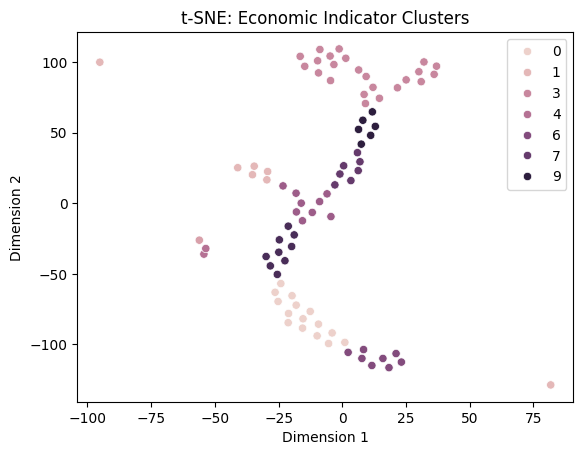

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_results = tsne.fit_transform(Z_Score_numeric)

# t-SNE DataFrame
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])

sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue=labels)
plt.title('t-SNE: Economic Indicator Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

### Z-Score of Pre-Recession

In [55]:
import pandas as pd
from scipy.stats import zscore

# Example DataFrame
Carter_data = Pre_1980_Recession.copy()

Carter_data_df = pd.DataFrame(Carter_data)

# Set 'Quarter' as index
Carter_data_df.set_index('Date', inplace=True)

Carter_data_df = Carter_data_df.select_dtypes(include=['float64', 'int64'])

Carter_data_df.dropna()

# Compute Z-scores for each column
Pre_Carter_Recession_Z_Score = Carter_data_df.apply(zscore)

Pre_Carter_Recession_Z_Score


Fed_Funds_Rate  Business_Sentiment  \
Date                                                                       
(1979-01-01, 1979-01-01, 1979-01-01)       -0.791304            1.256873   
(1979-04-01, 1979-04-01, 1979-04-01)       -0.713760            0.648282   
(1979-07-01, 1979-07-01, 1979-07-01)       -0.177999           -0.648282   
(1979-10-01, 1979-10-01, 1979-10-01)        1.683063           -1.256873   

                                      Consumer_Sentiment  \
Date                                                       
(1979-01-01, 1979-01-01, 1979-01-01)            1.545494   
(1979-04-01, 1979-04-01, 1979-04-01)            0.189017   
(1979-07-01, 1979-07-01, 1979-07-01)           -1.056273   
(1979-10-01, 1979-10-01, 1979-10-01)           -0.678238   

                                      Credit_Card_Conditons  Oil_Prices  \
Date                                                                      
(1979-01-01, 1979-01-01, 1979-01-01)              -1.254582   -0.977227   
(1979-04-01, 1979-04-01, 1979-04-01)              -0.574249   -0.799952   
(1979-07-01, 1979-07-01, 1979-07-01)               0.454010    0.245969   
(1979-10-01, 1979-10-01, 1979-10-01)               1.374822    1.531210   

                                      Housing_Starts  Jobless_Claims  \
Date                                                                   
(1979-01-01, 1979-01-01, 1979-01-01)       -1.420608       -1.195930   
(1979-04-01, 1979-04-01, 1979-04-01)        0.821957       -0.468904   
(1979-07-01, 1979-07-01, 1979-07-01)        1.050015        0.138140   
(1979-10-01, 1979-10-01, 1979-10-01)       -0.451364        1.526695   

                                      Total_Jons  Yield_Curve  \
Date                                                            
(1979-01-01, 1979-01-01, 1979-01-01)   -1.395378    -0.209447   
(1979-04-01, 1979-04-01, 1979-04-01)   -0.474451     0.237374   
(1979-07-01, 1979-07-01, 1979-07-01)    0.735305     1.382353   
(1979-10-01, 1979-10-01, 1979-10-01)    1.134524    -1.410279   

                                      GDP_Growth_Rate  Change_in_CPI  \
Date                                                                   
(1979-01-01, 1979-01-01, 1979-01-01)        -1.091879      -1.321373   
(1979-04-01, 1979-04-01, 1979-04-01)        -0.865519      -0.486822   
(1979-07-01, 1979-07-01, 1979-07-01)         0.711326       0.466951   
(1979-10-01, 1979-10-01, 1979-10-01)         1.246071       1.341243   

                                      Labor_Force_Change  Change_in_PPI  \
Date                                                                      
(1979-01-01, 1979-01-01, 1979-01-01)        1.004859e-13      -1.379089   
(1979-04-01, 1979-04-01, 1979-04-01)       -1.414214e+00      -0.361190   
(1979-07-01, 1979-07-01, 1979-07-01)        1.004859e-13       0.394025   
(1979-10-01, 1979-10-01, 1979-10-01)        1.414214e+00       1.346254   

                                      Unemployment_Rate_Change  \
Date                                                             
(1979-01-01, 1979-01-01, 1979-01-01)                  0.447214   
(1979-04-01, 1979-04-01, 1979-04-01)                 -0.447214   
(1979-07-01, 1979-07-01, 1979-07-01)                 -1.341641   
(1979-10-01, 1979-10-01, 1979-10-01)                  1.341641   

                                      Deficit_Percent_of_GDP  \
Date                                                           
(1979-01-01, 1979-01-01, 1979-01-01)                1.341641   
(1979-04-01, 1979-04-01, 1979-04-01)                0.447214   
(1979-07-01, 1979-07-01, 1979-07-01)               -0.447214   
(1979-10-01, 1979-10-01, 1979-10-01)               -1.341641   

                                      M2_Stocks_Growth_Rate  \
Date                                                          
(1979-01-01, 1979-01-01, 1979-01-01)               1.255012   
(1979-04-01, 1979-04-01, 1979-04-01)               0.533435   
(1979-07-01, 1979-07-01, 19

In [56]:
import pandas as pd
from scipy.stats import zscore

# Example DataFrame
Reagan_data = Pre_1981_Recession.copy()

Reagan_data_df = pd.DataFrame(Reagan_data)

# Set 'Quarter' as index
Reagan_data_df.set_index('Date', inplace=True)

Reagan_data_df = Reagan_data_df.select_dtypes(include=['float64', 'int64'])

Reagan_data_df.dropna()

# Compute Z-scores for each column
Pre_Reagan_Recession_Z_Score = Reagan_data_df.apply(zscore)

Pre_Reagan_Recession_Z_Score


Fed_Funds_Rate  Business_Sentiment  \
Date                                                                       
(1980-07-01, 1980-07-01, 1980-07-01)       -1.687745           -1.657333   
(1980-10-01, 1980-10-01, 1980-10-01)        0.271274            0.991815   
(1981-01-01, 1981-01-01, 1981-01-01)        0.514933            0.177687   
(1981-04-01, 1981-04-01, 1981-04-01)        0.901538            0.487831   

                                      Consumer_Sentiment  \
Date                                                       
(1980-07-01, 1980-07-01, 1980-07-01)           -1.665552   
(1980-10-01, 1980-10-01, 1980-10-01)            0.986801   
(1981-01-01, 1981-01-01, 1981-01-01)            0.234953   
(1981-04-01, 1981-04-01, 1981-04-01)            0.443799   

                                      Credit_Card_Conditons  Oil_Prices  \
Date                                                                      
(1980-07-01, 1980-07-01, 1980-07-01)              -1.431514    1.306549   
(1980-10-01, 1980-10-01, 1980-10-01)              -0.426043   -1.507557   
(1981-01-01, 1981-01-01, 1981-01-01)               1.077095    0.100504   
(1981-04-01, 1981-04-01, 1981-04-01)               0.780462    0.100504   

                                      Housing_Starts  Jobless_Claims  \
Date                                                                   
(1980-07-01, 1980-07-01, 1980-07-01)       -1.352448        1.731220   
(1980-10-01, 1980-10-01, 1980-10-01)        0.853149       -0.551785   
(1981-01-01, 1981-01-01, 1981-01-01)        1.061552       -0.627649   
(1981-04-01, 1981-04-01, 1981-04-01)       -0.562254       -0.551785   

                                      Total_Jons  Yield_Curve  \
Date                                                            
(1980-07-01, 1980-07-01, 1980-07-01)   -1.482318     1.708122   
(1980-10-01, 1980-10-01, 1980-10-01)   -0.309455    -0.357514   
(1981-01-01, 1981-01-01, 1981-01-01)    0.670336    -0.820958   
(1981-04-01, 1981-04-01, 1981-04-01)    1.121437    -0.529650   

                                      GDP_Growth_Rate  Change_in_CPI  \
Date                                                                   
(1980-07-01, 1980-07-01, 1980-07-01)        -1.511661      -1.339981   
(1980-10-01, 1980-10-01, 1980-10-01)        -0.232710      -0.487266   
(1981-01-01, 1981-01-01, 1981-01-01)         1.136109       0.527871   
(1981-04-01, 1981-04-01, 1981-04-01)         0.608262       1.299375   

                                      Labor_Force_Change  Change_in_PPI  \
Date                                                                      
(1980-07-01, 1980-07-01, 1980-07-01)       -5.345225e-01      -1.323391   
(1980-10-01, 1980-10-01, 1980-10-01)       -1.069045e+00      -0.446973   
(1981-01-01, 1981-01-01, 1981-01-01)       -3.798011e-14       0.394388   
(1981-04-01, 1981-04-01, 1981-04-01)        1.603567e+00       1.375976   

                                      Unemployment_Rate_Change  \
Date                                                             
(1980-07-01, 1980-07-01, 1980-07-01)                  1.414214   
(1980-10-01, 1980-10-01, 1980-10-01)                  0.000000   
(1981-01-01, 1981-01-01, 1981-01-01)                  0.000000   
(1981-04-01, 1981-04-01, 1981-04-01)                 -1.414214   

                                      Deficit_Percent_of_GDP  \
Date                                                           
(1980-07-01, 1980-07-01, 1980-07-01)                0.347158   
(1980-10-01, 1980-10-01, 1980-10-01)                0.570129   
(1981-01-01, 1981-01-01, 1981-01-01)                0.793100   
(1981-04-01, 1981-04-01, 1981-04-01)               -1.710388   

                                      M2_Stocks_Growth_Rate  \
Date                                                          
(1980-07-01, 1980-07-01, 1980-07-01)               0.804795   
(1980-10-01, 1980-10-01, 1980-10-01)               0.804795   
(1981-01-01, 1981-01-01, 19

In [57]:
import pandas as pd
from scipy.stats import zscore

# Example DataFrame
HW_data = Pre_1990_Recession.copy()

HW_data_df = pd.DataFrame(HW_data)

# Set 'Quarter' as index
HW_data_df.set_index('Date', inplace=True)

HW_data_df = HW_data_df.select_dtypes(include=['float64', 'int64'])

HW_data_df.dropna()

# Compute Z-scores for each column
Pre_HW_Recession_Z_Score = HW_data_df.apply(zscore)

Pre_HW_Recession_Z_Score

Fed_Funds_Rate  Business_Sentiment  \
Date                                                                       
(1989-07-01, 1989-07-01, 1989-07-01)        1.559926           -1.058192   
(1989-10-01, 1989-10-01, 1989-10-01)        0.189524           -0.428524   
(1990-01-01, 1990-01-01, 1990-01-01)       -0.860146           -0.148672   
(1990-04-01, 1990-04-01, 1990-04-01)       -0.889304            1.635388   

                                      Consumer_Sentiment  \
Date                                                       
(1989-07-01, 1989-07-01, 1989-07-01)           -1.530184   
(1989-10-01, 1989-10-01, 1989-10-01)            0.892607   
(1990-01-01, 1990-01-01, 1990-01-01)           -0.255031   
(1990-04-01, 1990-04-01, 1990-04-01)            0.892607   

                                      Credit_Card_Conditons  Oil_Prices  \
Date                                                                      
(1989-07-01, 1989-07-01, 1989-07-01)              -1.528151   -0.399422   
(1989-10-01, 1989-10-01, 1989-10-01)              -0.231419   -0.099604   
(1990-01-01, 1990-01-01, 1990-01-01)               0.702082    1.610768   
(1990-04-01, 1990-04-01, 1990-04-01)               1.057488   -1.111741   

                                      Housing_Starts  Jobless_Claims  \
Date                                                                   
(1989-07-01, 1989-07-01, 1989-07-01)        0.167108       -1.618503   
(1989-10-01, 1989-10-01, 1989-10-01)        0.009284        0.131994   
(1990-01-01, 1990-01-01, 1990-01-01)        1.318295        0.383971   
(1990-04-01, 1990-04-01, 1990-04-01)       -1.494686        1.102538   

                                      Total_Jons  Volatility_Index  \
Date                                                                 
(1989-07-01, 1989-07-01, 1989-07-01)   -1.261274               NaN   
(1989-10-01, 1989-10-01, 1989-10-01)   -0.607131               NaN   
(1990-01-01, 1990-01-01, 1990-01-01)    0.550075               NaN   
(1990-04-01, 1990-04-01, 1990-04-01)    1.318331               NaN   

                                      Yield_Curve  GDP_Growth_Rate  \
Date                                                                 
(1989-07-01, 1989-07-01, 1989-07-01)     1.501111        -1.117677   
(1989-10-01, 1989-10-01, 1989-10-01)    -1.116211        -0.837989   
(1990-01-01, 1990-01-01, 1990-01-01)     0.269430         0.716819   
(1990-04-01, 1990-04-01, 1990-04-01)    -0.654330         1.238848   

                                      Change_in_CPI  Labor_Force_Change  \
Date                                                                      
(1989-07-01, 1989-07-01, 1989-07-01)      -1.200631           -0.816497   
(1989-10-01, 1989-10-01, 1989-10-01)      -0.679875           -0.816497   
(1990-01-01, 1990-01-01, 1990-01-01)       0.535221            1.632993   
(1990-04-01, 1990-04-01, 1990-04-01)       1.345285            0.000000   

                                      Change_in_PPI  Unemployment_Rate_Change  \
Date                                                                            
(1989-07-01, 1989-07-01, 1989-07-01)      -0.948847                 -1.507557   
(1989-10-01, 1989-10-01, 1989-10-01)      -0.948847                 -0.301511   
(1990-01-01, 1990-01-01, 1990-01-01)       1.395364                  0.904534   
(1990-04-01, 1990-04-01, 1990-04-01)       0.502331                  0.904534   

                                      Deficit_Percent_of_GDP  \
Date                                                           
(1989-07-01, 1989-07-01, 1989-07-01)                1.402504   
(1989-10-01, 1989-10-01, 1989-10-01)                0.412148   
(1990-01-01, 1990-01-01, 1990-01-01)               -0.578208   
(1990-04-01, 1990-04-01, 1990-04-01)               -1.236444   

                                      M2_Stocks_Growth_Rate  \
Date                                                          
(1989-07-01, 1989-07-01, 1989-07-01)         

In [58]:
import pandas as pd
from scipy.stats import zscore

# Example DataFrame
Dubya_data = Pre_2001_Recession.copy()

Dubya_data_df = pd.DataFrame(Dubya_data)

# Set 'Quarter' as index
Dubya_data_df.set_index('Date', inplace=True)

Dubya_data_df = Dubya_data_df.select_dtypes(include=['float64', 'int64'])

Dubya_data_df.dropna()

# Compute Z-scores for each column
Pre_Dubya_Recession_Z_Score = Dubya_data_df.apply(zscore)

Pre_Dubya_Recession_Z_Score

Fed_Funds_Rate  Business_Sentiment  \
Date                                                                       
(2000-04-01, 2000-04-01, 2000-04-01)        0.149788            1.063536   
(2000-07-01, 2000-07-01, 2000-07-01)        0.830643            0.628228   
(2000-10-01, 2000-10-01, 2000-10-01)        0.694472           -0.123667   
(2001-01-01, 2001-01-01, 2001-01-01)       -1.674904           -1.568097   

                                      Consumer_Sentiment  \
Date                                                       
(2000-04-01, 2000-04-01, 2000-04-01)            0.811250   
(2000-07-01, 2000-07-01, 2000-07-01)            0.655904   
(2000-10-01, 2000-10-01, 2000-10-01)            0.224388   
(2001-01-01, 2001-01-01, 2001-01-01)           -1.691542   

                                      Credit_Card_Conditons  Oil_Prices  \
Date                                                                      
(2000-04-01, 2000-04-01, 2000-04-01)              -1.145426   -1.462877   
(2000-07-01, 2000-07-01, 2000-07-01)              -0.822166    0.087523   
(2000-10-01, 2000-10-01, 2000-10-01)               0.788431    1.360927   
(2001-01-01, 2001-01-01, 2001-01-01)               1.179160    0.014427   

                                      Housing_Starts  Jobless_Claims  \
Date                                                                   
(2000-04-01, 2000-04-01, 2000-04-01)        1.068799       -1.199216   
(2000-07-01, 2000-07-01, 2000-07-01)       -1.550964       -0.549675   
(2000-10-01, 2000-10-01, 2000-10-01)       -0.168758        0.270116   
(2001-01-01, 2001-01-01, 2001-01-01)        0.650923        1.478775   

                                      Total_Jons  Volatility_Index  \
Date                                                                 
(2000-04-01, 2000-04-01, 2000-04-01)   -1.393182          0.343503   
(2000-07-01, 2000-07-01, 2000-07-01)   -0.216566         -1.713936   
(2000-10-01, 2000-10-01, 2000-10-01)    0.206334          0.737100   
(2001-01-01, 2001-01-01, 2001-01-01)    1.403413          0.633333   

                                      Yield_Curve  ...  Labor_Force_Change  \
Date                                               ...                       
(2000-04-01, 2000-04-01, 2000-04-01)    -0.941743  ...            1.212678   
(2000-07-01, 2000-07-01, 2000-07-01)    -0.555387  ...           -0.727607   
(2000-10-01, 2000-10-01, 2000-10-01)    -0.169031  ...           -1.212678   
(2001-01-01, 2001-01-01, 2001-01-01)     1.666161  ...            0.727607   

                                      Change_in_PPI  Unemployment_Rate_Change  \
Date                                                                            
(2000-04-01, 2000-04-01, 2000-04-01)      -1.262485                 -1.183216   
(2000-07-01, 2000-07-01, 2000-07-01)      -0.371319                  0.169031   
(2000-10-01, 2000-10-01, 2000-10-01)       0.133675                 -0.507093   
(2001-01-01, 2001-01-01, 2001-01-01)       1.500129                  1.521278   

                                      Deficit_Percent_of_GDP  \
Date                                                           
(2000-04-01, 2000-04-01, 2000-04-01)                1.341641   
(2000-07-01, 2000-07-01, 2000-07-01)                0.447214   
(2000-10-01, 2000-10-01, 2000-10-01)               -0.447214   
(2001-01-01, 2001-01-01, 2001-01-01)               -1.341641   

                                      M2_Stocks_Growth_Rate  \
Date                                                          
(2000-04-01, 2000-04-01, 2000-04-01)              -0.461960   
(2000-07-01, 2000-07-01, 2000-07-01)              -1.155459   
(2000-10-01, 2000-10-01, 2000-10-01)               0.052572   
(2001-01-01, 2001-01-01, 2001-01-01)               1.564847   

                                      Business_Inventories_Growth_Rate  \
Date                                                                     
(2000-04-01, 2000-04-01, 2000-04-01)           

## **Feature Engineering**

- `Fiscal Stress Index` = (Deficit % GDP) √ó (Interest Rate)  
- `Inflation Gap` = PPI ‚Äì CPI  
- `Jobs Momentum` = Total Jobs / Unemployment Rate
- `Inventories-to-Sales Ratio` = Job Inventories / Retail Sales
- `Credit Tightening Index`=	Corporate Bond Spreads √ó Credit Conditions Index	
- `Production Efficiency Index`= Industrial Production / Capacity Utilization
- `Labor Market Tightness Index` = Job Openings / Unemployment 
- `Volatility Shock` = QoQ % Change in VIX 
- `Liquidity Shock` = ŒîM2 QoQ 

### Fisical Stress Index

<Axes: >

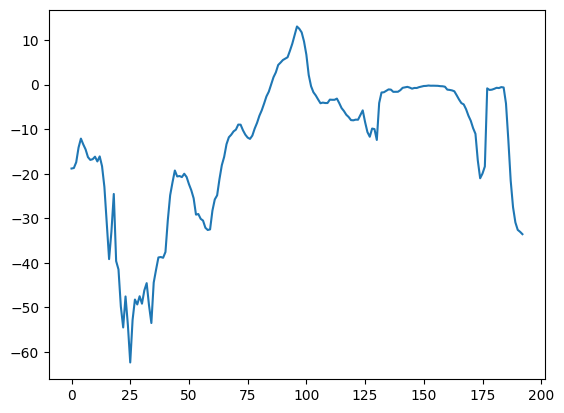

In [59]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Deficit_Percent_GDP = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Interest_Rates_df = pd.read_csv('Leading/Interest_Rates.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Deficit_Percent_GDP.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM InterestRates
JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
WHERE InterestRates.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Fisical_Stress_Index = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Fisical_Stress_Index

Fisical_Stress_Index = Fisical_Stress_Index.loc[:, ~Fisical_Stress_Index.columns.duplicated()]

# Rename columns to growth rate versions
Fisical_Stress_Index.columns = [
    'Date',
    'Interest_Rates',
    'Deficit_Percent_GDP'
]

Fisical_Stress_Index['Fisical_Stress_Index']= Fisical_Stress_Index['Interest_Rates'] * Fisical_Stress_Index['Deficit_Percent_GDP'].round(1)

Fisical_Stress_Index['Fisical_Stress_Index'].plot()

### Inflation Gap

<Axes: >

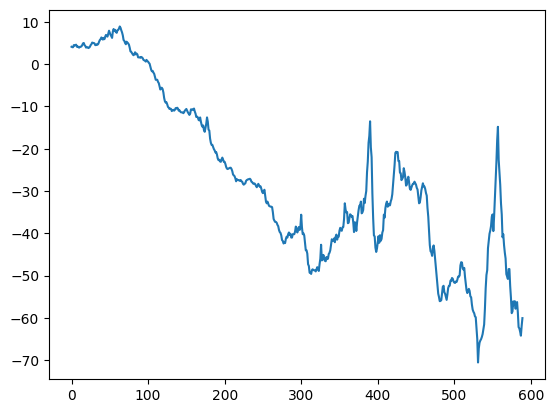

In [60]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM CPI
JOIN PPI ON CPI.observation_date = PPI.observation_date
WHERE CPI.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Inflation_Gap = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Inflation_Gap

Inflation_Gap = Inflation_Gap.loc[:, ~Inflation_Gap.columns.duplicated()]

# Rename columns to growth rate versions
Inflation_Gap.columns = [
    'Date',
    'CPI_Inflation_Rate',
    'PPI_Inflation_Rate'
]

Inflation_Gap['Inflation_Gap']= Inflation_Gap['PPI_Inflation_Rate'] - Inflation_Gap['CPI_Inflation_Rate'].round(2)

Inflation_Gap['Inflation_Gap'].plot()

### Jobs momentum



<Axes: >

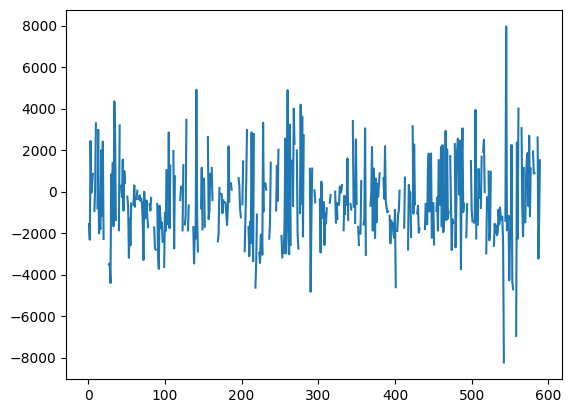

In [61]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Total_Jobs_df = pd.read_csv('Leading/Jobs_Added.csv')
PPI_Inflation_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('Unemployment', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Jobs
JOIN Unemployment ON Jobs.observation_date = Unemployment.observation_date
WHERE Jobs.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Jobs_Momentum = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Jobs_Momentum

Jobs_Momentum = Jobs_Momentum.loc[:, ~Jobs_Momentum.columns.duplicated()]

# Rename columns to growth rate versions
Jobs_Momentum.columns = [
    'Date',
    'Total_Jobs',
    'Unemploymeny_Rate'
]

Jobs_Momentum['Total_Jobs_Change'] = Jobs_Momentum['Total_Jobs'].diff()
Jobs_Momentum['Unemploymeny_Rate_Change'] = Jobs_Momentum['Unemploymeny_Rate'].diff()

Jobs_Momentum['Job_Momentum'] = Jobs_Momentum['Total_Jobs_Change'] / Jobs_Momentum['Unemploymeny_Rate_Change'].round(2)

Jobs_Momentum['Job_Momentum'].plot()


### Inventories-to-Sales Ratio

<Axes: >

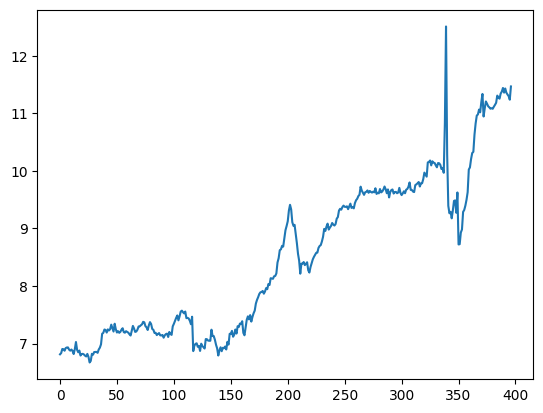

In [62]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Sales', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Inventories
JOIN Sales ON Inventories.observation_date = Sales.observation_date

"""

# Execute the query and load results into a DataFrame
Inventories_to_Sales_Ratio = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Inventories_to_Sales_Ratio

Inventories_to_Sales_Ratio = Inventories_to_Sales_Ratio.loc[:, ~Inventories_to_Sales_Ratio.columns.duplicated()]

# Rename columns to growth rate versions
Inventories_to_Sales_Ratio.columns = [
    'Date',
    'Business_Inventories',
    'Retail_Sales'
]

Inventories_to_Sales_Ratio['Inventories_to_Sales_Ratio']= Inventories_to_Sales_Ratio['Business_Inventories'] / Inventories_to_Sales_Ratio['Retail_Sales'].round(2)

Inventories_to_Sales_Ratio['Inventories_to_Sales_Ratio'].plot()

### Credit Tighteness Index

<Axes: >

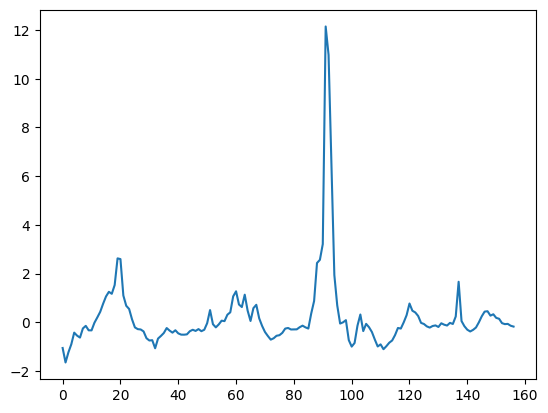

In [63]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Corporate_Bond_Spreads_df = pd.read_csv('Lagging/Corporate_Bond_Spreads.csv')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Corporate_Bond_Spreads_df.to_sql('CorporateBond', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditCondition', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM CorporateBond
JOIN CreditCondition ON CorporateBond.observation_date = CreditCondition.observation_date

"""

# Execute the query and load results into a DataFrame
Credit_Tightness_Index = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Credit_Tightness_Index

Credit_Tightness_Index = Credit_Tightness_Index.loc[:, ~Credit_Tightness_Index.columns.duplicated()]

# Rename columns to growth rate versions
Credit_Tightness_Index.columns = [
    'Date',
    'Corporate_Bond_Spreads',
    'Credit_Conditions_Index'
]

Credit_Tightness_Index['Credit_Tightness_Index']= Credit_Tightness_Index['Corporate_Bond_Spreads'] * Credit_Tightness_Index['Credit_Conditions_Index'].round(2)

Credit_Tightness_Index['Credit_Tightness_Index'].plot()

### Production Efficency Index

In [64]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM IndProd
JOIN Capacity ON IndProd.observation_date = Capacity.observation_date

"""

# Execute the query and load results into a DataFrame
Production_Efficency_Index = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Production_Efficency_Index

Production_Efficency_Index = Production_Efficency_Index.loc[:, ~Production_Efficency_Index.columns.duplicated()]

# Rename columns to growth rate versions
Production_Efficency_Index.columns = [
    'Date',
    'Industrial_Production',
    'Capacity_Utilization'
]

Production_Efficency_Index['Production_Efficency_Index']= Production_Efficency_Index['Industrial_Production'] / Production_Efficency_Index['Capacity_Utilization'].round(2)

Production_Efficency_Index

Date  Industrial_Production  Capacity_Utilization  \
0    1967-01-01                35.1638               88.1496   
1    1967-04-01                34.8951               86.6086   
2    1967-07-01                34.5076               86.0431   
3    1967-10-01                35.3976               87.1866   
4    1968-01-01                36.2514               87.3375   
..          ...                    ...                   ...   
227  2023-10-01               102.5781               78.2766   
228  2024-01-01               101.4830               77.7036   
229  2024-04-01               102.3568               77.9731   
230  2024-07-01               102.5192               77.6310   
231  2024-10-01               102.2669               77.1891   

     Production_Efficency_Index  
0                      0.398909  
1                      0.402899  
2                      0.401065  
3                      0.405982  
4                      0.415061  
..                          ...  
227                    1.310400  
228                    1.306088  
229                    1.312772  
230                    1.320613  
231                    1.324872  

[232 rows x 4 columns]

### Labor Market Tightness Index

<Axes: >

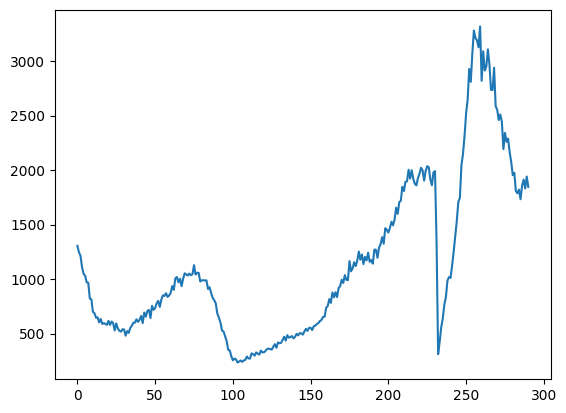

In [65]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Job_Openings_df = pd.read_csv('Lagging/Job_Openings.csv')
Unemployment_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Job_Openings_df.to_sql('Job_Opening', conn, index=False, if_exists='replace')
Unemployment_df.to_sql('Unemployment', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Job_Opening
JOIN Unemployment ON Job_Opening.observation_date = Unemployment.observation_date

"""

# Execute the query and load results into a DataFrame
Labor_Market_Tightness = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Labor_Market_Tightness

Labor_Market_Tightness = Labor_Market_Tightness.loc[:, ~Labor_Market_Tightness.columns.duplicated()]

# Rename columns to growth rate versions
Labor_Market_Tightness.columns = [
    'Date',
    'Job_Openings',
    'Unemployment_Rate'
]

Labor_Market_Tightness['Labor_Market_Tightness']= Labor_Market_Tightness['Job_Openings'] / Labor_Market_Tightness['Unemployment_Rate'].round(2)

Labor_Market_Tightness['Labor_Market_Tightness'].plot()

### Liquidity Shock

<Axes: >

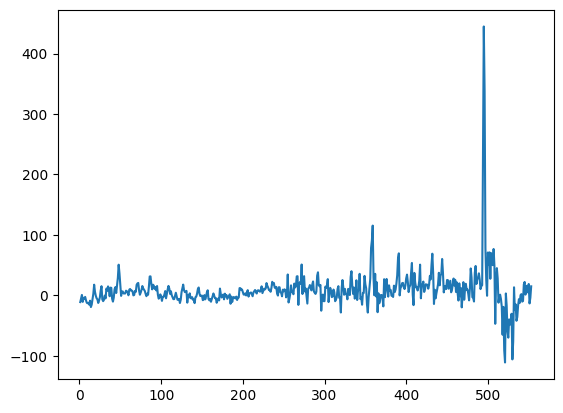

In [66]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Real_M2_Stocks_df.to_sql('M2_Stocks', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM M2_Stocks
WHERE M2_Stocks.observation_date >= '1979-01-01'

"""

# Execute the query and load results into a DataFrame
Liquidity_Shock = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Liquidity_Shock

Liquidity_Shock = Liquidity_Shock.loc[:, ~Liquidity_Shock.columns.duplicated()]

# Rename columns to growth rate versions
Liquidity_Shock.columns = [
    'Date',
    'M2_Stock_Change'
]

Liquidity_Shock['M2_Stock_Change']= Liquidity_Shock['M2_Stock_Change'].diff()

Liquidity_Shock['M2_Stock_Change'].plot()

### Volatility Shock

<Axes: >

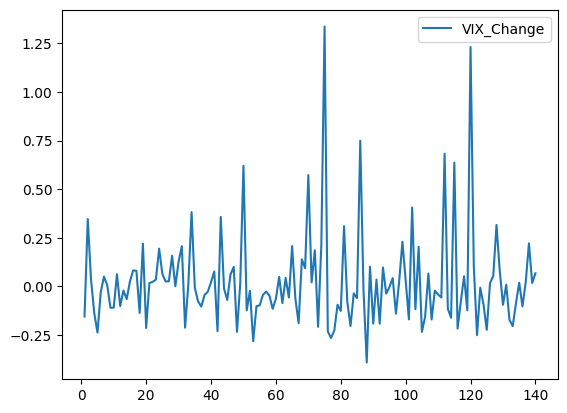

In [67]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')


# ---------------------------------------------------
# üóÉÔ∏è Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Volatility_Index_df.to_sql('VIX', conn, index=False, if_exists='replace')

# ---------------------------
# üìä SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM VIX
"""

# Execute the query and load results into a DataFrame
Volatility_Shock = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Volatility_Shock

Volatility_Shock = Volatility_Shock.loc[:, ~Volatility_Shock.columns.duplicated()]

# Rename columns to growth rate versions
Volatility_Shock.columns = [
    'Date',
    'VIX_Change'
]

Volatility_Shock['VIX_Change']= Volatility_Shock['VIX_Change'].pct_change()

Volatility_Shock.plot()

In [68]:
# Early 1990s Recession (July 1990-March-1991)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Jobs_Momentum.to_sql('Jobs_Momentum', conn, index=False, if_exists='replace')
Fisical_Stress_Index.to_sql('Fisical_Stress_Index', conn, index=False, if_exists='replace')
Inventories_to_Sales_Ratio.to_sql('Inventories_to_Sales_Ratio', conn, index=False, if_exists='replace')
Inflation_Gap.to_sql('Inflation_Gap', conn, index=False, if_exists='replace')
Credit_Tightness_Index.to_sql('Credit_Tightness_Index', conn, index=False, if_exists='replace')
Labor_Market_Tightness.to_sql('Labor_Market_Tightness', conn, index=False, if_exists='replace')
Production_Efficency_Index.to_sql('Production_Efficency_Index', conn, index=False, if_exists='replace')
Liquidity_Shock.to_sql('Liquidity_Shock', conn, index=False, if_exists='replace')
Volatility_Shock.to_sql('Volatility_Shock', conn, index=False, if_exists='replace')
Yield_Curve_df.to_sql('Yield_Curve', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT Fisical_Stress_Index.date, Fisical_Stress_Index, Job_Momentum, Inflation_Gap, Inventories_to_Sales_Ratio, Credit_Tightness_Index, Production_Efficency_Index, Labor_Market_Tightness, M2_Stock_Change, VIX_Change, Yield_Curve_10Y_2Y_Inversion
FROM Fisical_Stress_Index
LEFT JOIN Jobs_Momentum ON Fisical_Stress_Index.date = Jobs_Momentum.date
LEFT JOIN Inventories_to_Sales_Ratio ON Fisical_Stress_Index.date = Inventories_to_Sales_Ratio.date
LEFT JOIN Inflation_Gap ON Fisical_Stress_Index.date = Inflation_Gap.date
LEFT JOIN Credit_Tightness_Index ON Fisical_Stress_Index.date = Credit_Tightness_Index.date
LEFT JOIN Labor_Market_Tightness ON Fisical_Stress_Index.date = Labor_Market_Tightness.date
LEFT JOIN Production_Efficency_Index ON Fisical_Stress_Index.date = Production_Efficency_Index.date
LEFT JOIN Liquidity_Shock ON Fisical_Stress_Index.date = Liquidity_Shock.date
LEFT JOIN Volatility_Shock ON Fisical_Stress_Index.date = Volatility_Shock.date
LEFT JOIN Yield_Curve ON Fisical_Stress_Index.date = Yield_Curve.observation_date
WHERE Fisical_Stress_Index.date >= '1976-07-01'
AND Fisical_Stress_Index.date <= '2025-04-01'
ORDER BY Fisical_Stress_Index.date
"""


# Run the query
Derived_Features_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Derived_Features_df.csv"
Derived_Features_df.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Derived_Features_df

Date  Fisical_Stress_Index  Job_Momentum  Inflation_Gap  \
0    1976-07-01               -17.424    855.000000          4.600   
1    1976-10-01               -14.123    190.000000          4.000   
2    1977-01-01               -12.116   -806.666667          4.100   
3    1977-04-01               -13.416  -1685.000000          4.900   
4    1977-07-01               -14.550  -1153.333333          4.300   
..          ...                   ...           ...            ...   
186  2023-01-01               -27.511           inf        -40.233   
187  2023-04-01               -30.938  -2160.000000        -45.952   
188  2023-07-01               -32.612  -1480.000000        -50.785   
189  2023-10-01               -33.046   1860.000000        -52.458   
190  2024-01-01               -33.579  -1190.000000        -58.484   

     Inventories_to_Sales_Ratio  Credit_Tightness_Index  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   
..                          ...                     ...   
186                   10.944034                  0.2758   
187                   11.167013                  0.3312   
188                   11.079215                  0.1840   
189                   11.114282                  0.1464   
190                   11.306866                 -0.0324   

     Production_Efficency_Index  Labor_Market_Tightness  M2_Stock_Change  \
0                      0.551284                     NaN              NaN   
1                      0.550599                     NaN              NaN   
2                      0.554254                     NaN              NaN   
3                      0.562709                     NaN              NaN   
4                      0.570816                     NaN              NaN   
..                          ...                     ...              ...   
186                    1.290799             2969.428571            -43.7   
187                    1.304488             2938.823529            -76.1   
188                    1.305868             2458.857143            -15.0   
189                    1.310400             2192.307692            -16.8   
190                    1.306088             2288.648649              0.3   

     VIX_Change  Yield_Curve_10Y_2Y_Inversion  
0           NaN                          0.98  
1           NaN                          1.43  
2           NaN                          1.31  
3           NaN                          1.41  
4           NaN                          1.06  
..          ...                           ...  
186   -0.172800                         -0.68  
187   -0.205029                         -0.56  
188   -0.086983                         -0.93  
189    0.018654                         -0.27  
190   -0.103336                         -0.26  

[191 rows x 11 columns]

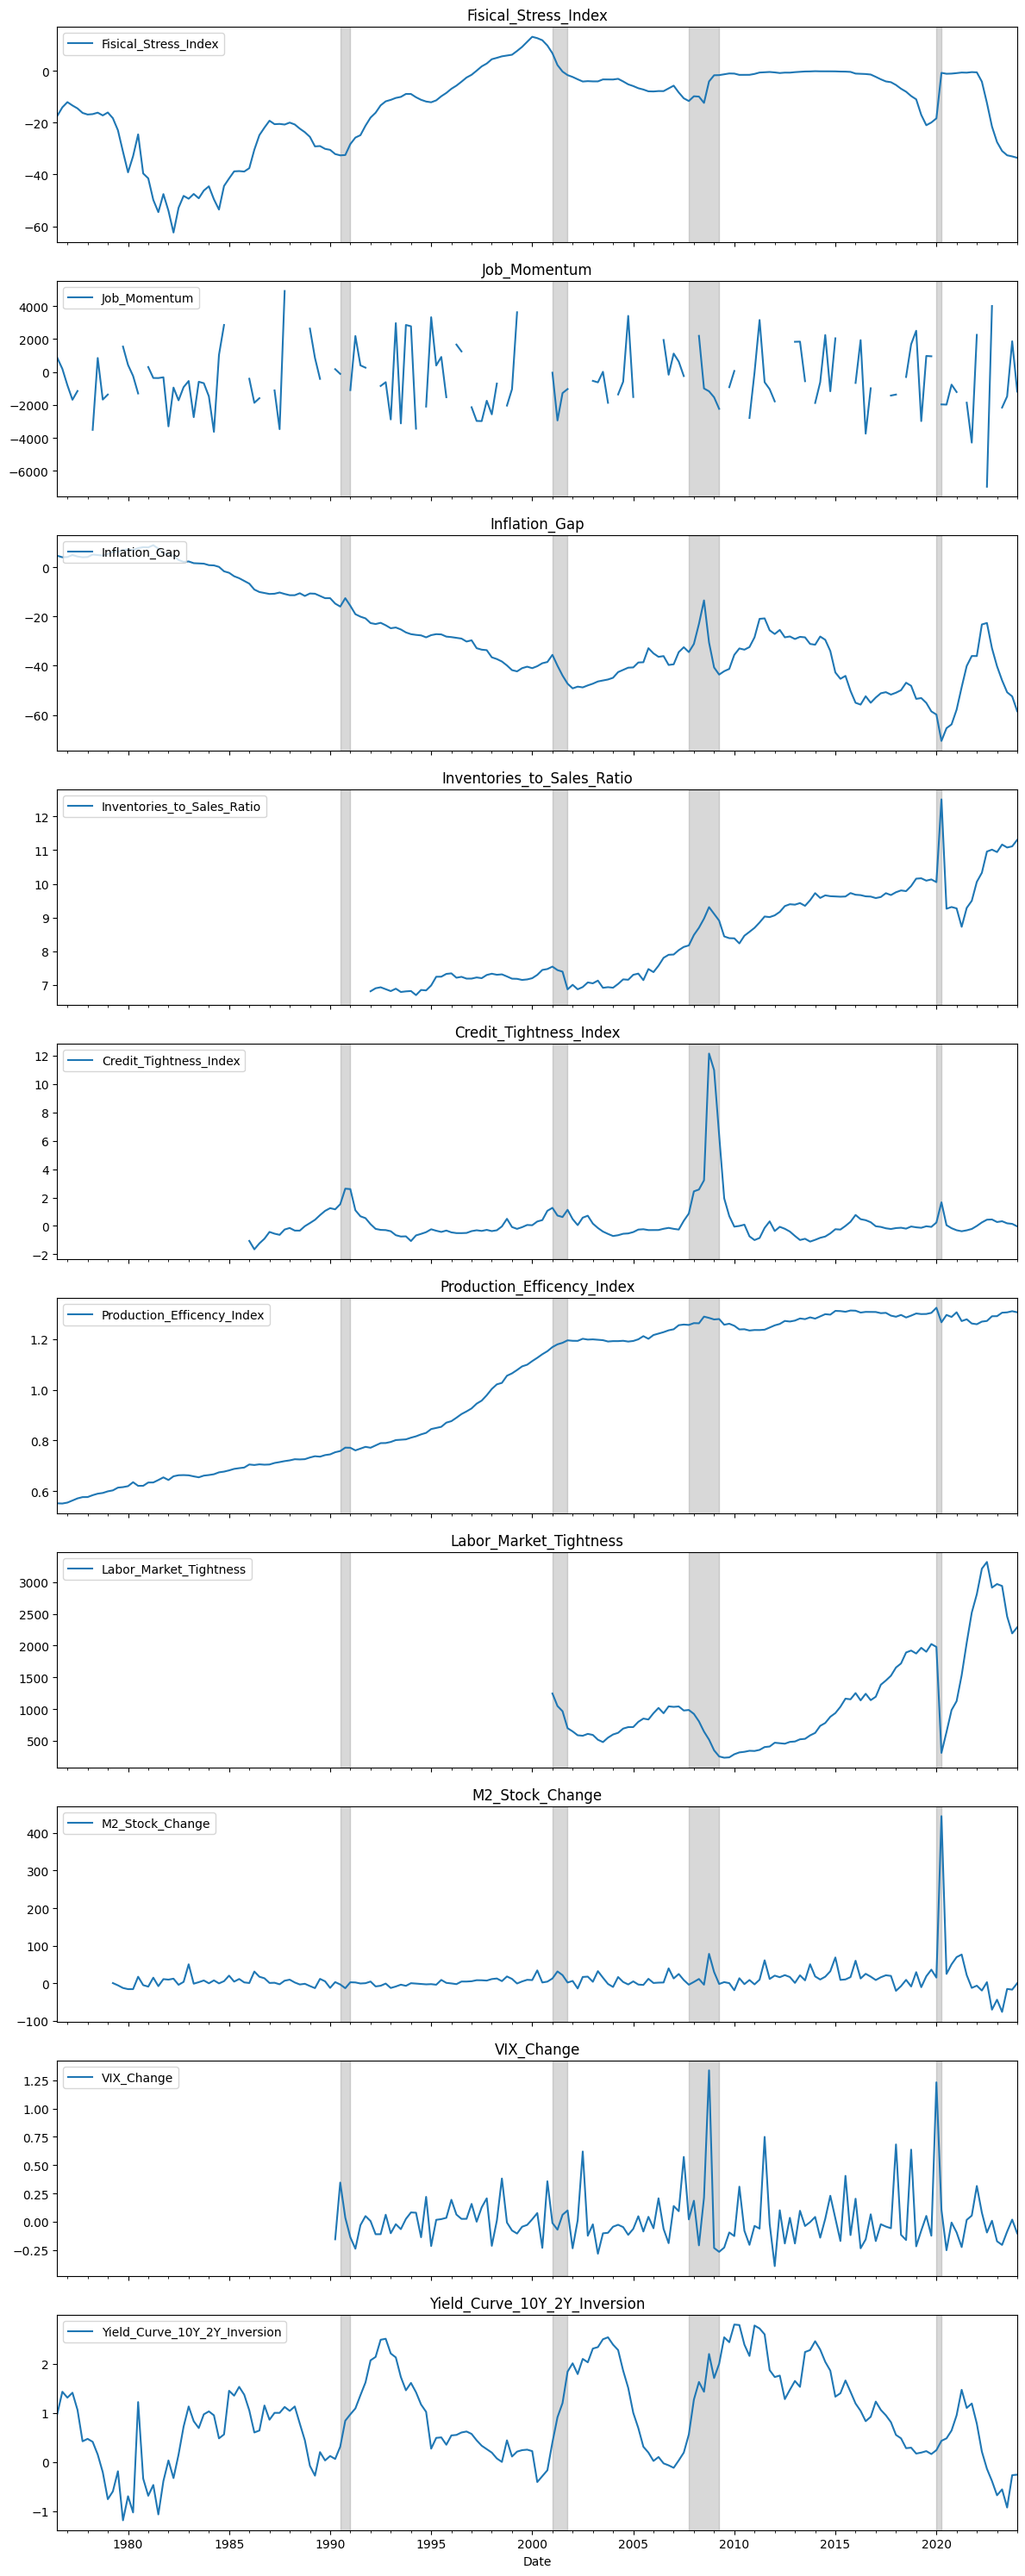

In [69]:
import matplotlib.pyplot as plt
# Convert the 'Date' column to datetime format and set as index
import pandas as pd

# Load the uploaded CSV file
file_path = 'Derived_Features_df.csv'
Derived_Features_df = pd.read_csv(file_path)

# Display basic info and preview of the dataset

Derived_Features_df['Date'] = pd.to_datetime(Derived_Features_df['Date'])
Derived_Features_df.set_index('Date', inplace=True)

# Display date range and any missing data by column
df_range = (Derived_Features_df.index.min(), Derived_Features_df.index.max())
missing_data = Derived_Features_df.isna().sum()

df_range, missing_data

# Define NBER U.S. recession periods (source: https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions)
recessions = [
    ("1990-07-01", "1991-03-01"),
    ("2001-03-01", "2001-11-01"),
    ("2007-12-01", "2009-06-01"),
    ("2020-02-01", "2020-04-01")
]
recessions = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in recessions]

# Plot each feature with recession shading
features = Derived_Features_df.columns
fig, axes = plt.subplots(len(features), 1, figsize=(12, 3 * len(features)), sharex=True)

for i, col in enumerate(features):
    ax = axes[i]
    Derived_Features_df[col].plot(ax=ax, label=col)
    for start, end in recessions:
        ax.axvspan(start, end, color='gray', alpha=0.3)
    ax.set_title(col)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()



### Fully available indicators:
- Fiscal Stress Index  
- Job Momentum  
- Inflation Gap *(new)*  
- Production Efficiency Index  
- Yield_Curve_10Y_2Y_Inversion *(new)*  

### Partially missing:
- Inventories to Sales Ratio (62 missing)
- Credit Tightness Index (38 missing)
- Labor Market Tightness (98 missing)
- M2 Stock Change (11 missing)
- VIX Change (55 missing)

---

### ‚úÖ **Consistently Shift Before Downturns**:
These indicators exhibit **clear directional movement** (spike, dip, or inversion) ahead of most recessions:

- **Fiscal Stress Index**: Sharp increases before or during every recession.
- **Job Momentum**: Declines notably prior to each downturn.
- **Yield Curve**: Inversions (negative values) consistently precede recessions ‚Äî a classic leading indicator.
- **M2 Stock Change**: Slows or dips before most downturns.
- **VIX Change**: Tends to spike around or just before downturns (though less early for 2001).

---

### ‚ö†Ô∏è **Partially Consistent or Lagging**:
- **Credit Tightness Index**: Tends to rise during recessions, but not always **before**.
- **Production Efficiency Index**: Gradual declines are visible but not reliably early.
- **Inflation Gap**: Mixed signals ‚Äî can increase or decrease before recessions.
- **Inventories to Sales Ratio**: Sparse and volatile data.
- **Labor Market Tightness**: Very sparse; hard to draw consistent conclusions.

---

### Regression Modeling Path

In [70]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace inf/-inf with NaN
Derived_Features_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaNs with column means
Derived_Features_df.fillna(Derived_Features_df.mean(), inplace=True)

# Now safely apply StandardScaler
scaler = StandardScaler()
df_z = pd.DataFrame(
    scaler.fit_transform(Derived_Features_df),
    index=Derived_Features_df.index,
    columns=Derived_Features_df.columns
)

# Create lag features (e.g., lag 1 to lag 4)
lags = [1, 2, 3, 4]
df_lagged = df_z.copy()
for col in df_z.columns:
    for lag in lags:
        df_lagged[f"{col}_lag{lag}"] = df_z[col].shift(lag)

# Drop rows with missing lag values
df_lagged.dropna(inplace=True)



In [71]:
from scipy.stats import zscore

# Columns to clean and fill
columns_to_fill = [
    'Fisical_Stress_Index',
    'Job_Momentum',
    'Yield_Curve_10Y_2Y_Inversion',
    'M2_Stock_Change',
    'VIX_Change'
]

# Recompute Proxy Recession Risk Score
Derived_Features_df['Proxy_Recession_Risk'] = (
    0.25 * zscore(Derived_Features_df['Fisical_Stress_Index']) +
    0.25 * zscore(Derived_Features_df['Job_Momentum']) +
    0.20 * zscore(Derived_Features_df['Yield_Curve_10Y_2Y_Inversion']) +
    0.15 * zscore(Derived_Features_df['M2_Stock_Change']) +
    0.15 * zscore(Derived_Features_df['VIX_Change'])
)

# Preview results
Derived_Features_df[['Proxy_Recession_Risk']].tail()


Proxy_Recession_Risk
Date                            
2023-01-01             -0.918336
2023-04-01             -1.353809
2023-07-01             -1.023480
2023-10-01             -0.308252
2024-01-01             -0.796819

In [72]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

X = df_lagged
y = Derived_Features_df.loc[df_lagged.index, 'Proxy_Recession_Risk']

tscv = TimeSeriesSplit(n_splits=5)
model = XGBRegressor()
for train_idx, test_idx in tscv.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    preds = model.predict(X.iloc[test_idx])



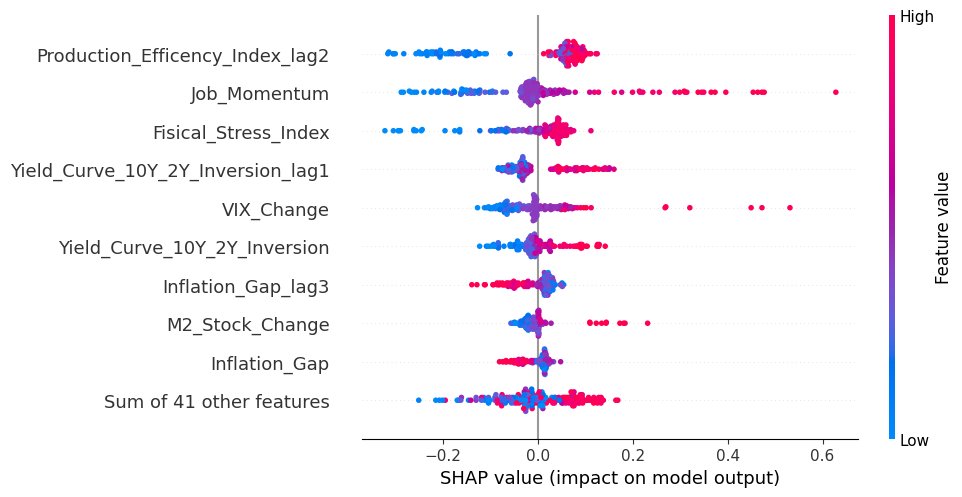

In [73]:
import shap
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

### Unsupervised / Distance Based Path

#### PCA / Autoencoder


In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X.iloc[train_idx])
reconstructed = pca.inverse_transform(pca.transform(X))
reconstruction_error = ((X - reconstructed) ** 2).mean(axis=1)


## üîÅ Time-Series Forecasting Logic  


| Model | Notes |
|-------|-------|
| **XGBoostRegressor / LightGBM** | Probabilistic regression + SHAP |
| **LSTM / TCN Regressor** | Sequential models with memory |
| **Autoencoder / PCA** | Unsupervised ‚Äúdistance from stability‚Äù |
| **KMeans / Mahalanobis** | Fragility score via clustering or distance |
| **Bayesian Models** | Risk forecast + uncertainty intervals |

---

## üìà Output Format  

Predictions are **continuous** risk levels per quarter:

| Quarter | Forecasted Recession Risk (%) |
|---------|-------------------------------|
| Q1 2024 | 18.3% |
| Q2 2024 | **45.7%** |
| Q3 2024 | **63.5%** |
| Q4 2024 | 70.2% |

üéØ **Interpretation**: Gradual uptick in risk ‚Üí potential early warning ‚Üí actionable insight.

#### Mahalanobis Distance

In [78]:
from scipy.spatial.distance import mahalanobis
import numpy as np

mu = X.iloc[train_idx].mean()
cov = np.cov(X.iloc[train_idx].T)
inv_covmat = np.linalg.inv(cov)

risk_score = X.apply(lambda row: mahalanobis(row, mu, inv_covmat), axis=1)
